In [2]:
import wooldridge as wd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS
import io
from statsmodels.stats.diagnostic import acorr_ljungbox
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from statsmodels.tsa.stattools import kpss
from rpy2.robjects import pandas2ri
from rpy2.robjects import conversion as cv
from scipy.stats import chi2 

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\rpy2\rinterface\__init__.py:1211: UserWarning: Environment variable "PATH" redefined by R and overriding existing variable. Current: "c:\Users\daves\AppData\Local\Programs\Python\Python313;c:\Users\daves\AppData\Roaming\Python\Python313\Scripts;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.9\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.9\libnvvp;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\dotnet\;C:\Program Files\NVIDIA Corporation\NVIDIA App\NvDLISR;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\Nsight Compute 2025.2.0\;C:\Users\daves\AppData\Local\Programs\Python\Launcher\;C:\Users\daves\AppData\Local\Microsoft\WindowsApps;C:\Users

In [3]:
##Load data
intdef = wd.data('intdef')
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0
9,1957,3.27,3.3,17.700001,17.000000,-0.700001,2.66,1.5,-1.000000,0.610000,1.8,0.299999,0


In [4]:
## Maddala and Wu (1999) test for unbalanced panel data



In [5]:
# Create a time trend variable starting from 0
intdef['time_index'] = intdef['year'] - intdef['year'].min()

In [6]:
# --- 1. Trend-stationary model ---
# Model: i3_t = β₀ + β₁*year + uₜ
# We regress the inflation rate 'i3' on a constant and the 'year' column.
y = intdef['i3']
X = sm.add_constant(intdef['time_index'])
model_det = sm.OLS(y, X, missing='drop').fit()
print(model_det.summary())

                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     10.72
Date:                qua, 11 jun 2025   Prob (F-statistic):            0.00185
Time:                        14:55:22   Log-Likelihood:                -132.89
No. Observations:                  56   AIC:                             269.8
Df Residuals:                      54   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9399      0.697      4.216      0.0

In [7]:
# --- 2. Stochastic trend model ---
# Model: Δi3_t = α₀ + εₜ
# Where Δi3_t is the first difference of i3_t, and εₜ is a white noise term.
# The general solution for this first-order difference equation is y_t = y_0 + Σ(ε_i) + α_0*t

delta_y = intdef['i3'].diff().dropna()
X = pd.DataFrame({'const': np.ones(len(delta_y))}, index=delta_y.index)
model_stoch_correct = sm.OLS(delta_y, X).fit()

print("\n---  Stochastic Trend Model ---")
print(model_stoch_correct.summary())


---  Stochastic Trend Model ---
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                qua, 11 jun 2025   Prob (F-statistic):                nan
Time:                        14:55:22   Log-Likelihood:                -94.751
No. Observations:                  55   AIC:                             191.5
Df Residuals:                      54   BIC:                             193.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.00

In [8]:
# --- 3. Pure Random Walk Model Test ---
# We test the model: Δi3_t = α₀ + εₜ
# If α₀ is not statistically different from 0, the model simplifies to Δi3_t = εₜ,
# which is the definition of a pure random walk.

#delta_y already defined above
X = pd.DataFrame({'const': np.ones(len(delta_y))}, index=delta_y.index)
model_rw = sm.OLS(delta_y, X).fit()

# 4. Print the summary and interpret the results
print("\n--- Pure Random Walk Model Test (Δi3_t = α₀ + εₜ) ---")
print(model_rw.summary())


--- Pure Random Walk Model Test (Δi3_t = α₀ + εₜ) ---
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                qua, 11 jun 2025   Prob (F-statistic):                nan
Time:                        14:55:22   Log-Likelihood:                -94.751
No. Observations:                  55   AIC:                             191.5
Df Residuals:                      54   BIC:                             193.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [9]:
# --- 4. Random Walk with Drift Model ---
# Model: Δi3_t = α₀ + εₜ
# We estimate the drift parameter α₀ and test its significance.

X = pd.DataFrame({'const': np.ones(len(delta_y))}, index=delta_y.index)
model_rwd = sm.OLS(delta_y, X).fit()

# 4. Print the summary and interpret the results
print("\n--- Random Walk with Drift Model (Δi3_t = α₀ + εₜ) ---")
print(model_rwd.summary())


--- Random Walk with Drift Model (Δi3_t = α₀ + εₜ) ---
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                qua, 11 jun 2025   Prob (F-statistic):                nan
Time:                        14:55:22   Log-Likelihood:                -94.751
No. Observations:                  55   AIC:                             191.5
Df Residuals:                      54   BIC:                             193.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [10]:
# --- 5. General trend plus irregular model---
# This creates an ARMA(1, 1) model, which is ARIMA(1, 0, 1).
# A constant 'c' is included for the intercept.

model_no_differencing = sm.tsa.arima.ARIMA(intdef['i3'], order=(1, 0, 1), trend='c')
results_no_differencing = model_no_differencing.fit()

# Print the final model summary
print("\n--- General trend plus irregular model  ---")
print(results_no_differencing.summary())


--- General trend plus irregular model  ---
                               SARIMAX Results                                
Dep. Variable:                     i3   No. Observations:                   56
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -92.364
Date:                qua, 11 jun 2025   AIC                            192.727
Time:                        14:55:22   BIC                            200.829
Sample:                             0   HQIC                           195.868
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3507      1.380      3.152      0.002       1.645       7.056
ar.L1          0.8096      0.075     10.766      0.000       0.662       0.957
ma.L1  

In [11]:
## Removing the trend
#Differencing the time series to remove the trend
#The dth difference of a process with d unit roots is stationary.   

# Calculate the first difference for the 'inf' column (change in inflation)
intdef['cinf'] = intdef['inf'].diff()

# Calculate the first difference for the 'def' column (change in deficit)
intdef['cdef'] = intdef['def'].diff()

# Calculate the first difference for the 'i3' column (change in 3-month T-bill rate)
intdef['ci3'] = intdef['i3'].diff()


# Display the dataframe with the new differenced columns
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77,time_index
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0,1
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0,2
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0,3
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0,4
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0,5
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0,6
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0,7
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0,8
9,1957,3.27,3.3,17.700001,17.000000,-0.700001,2.66,1.5,-1.000000,0.610000,1.8,0.299999,0,9


In [12]:
##Detrending the series using OLS regression

# 1. Perform the regression of i3 on the time trend.
# We need to add a constant (intercept) to our independent variable.
X = sm.add_constant(intdef['time_index'])
y = intdef['i3']

# Fit the OLS model.
model = sm.OLS(y, X).fit()

# 2. Get the residuals to create the detrended series.
# This is equivalent to Stata's 'predict ..., resid' command.
intdef['i3_detrended'] = model.resid


# Display the model summary and the final dataframe
print("--- OLS Regression Results ---")
print(model.summary())
print("\n--- Dataframe with Detrended Series ---")
print(intdef)

--- OLS Regression Results ---
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     10.72
Date:                qua, 11 jun 2025   Prob (F-statistic):            0.00185
Time:                        14:55:22   Log-Likelihood:                -132.89
No. Observations:                  56   AIC:                             269.8
Df Residuals:                      54   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9399

In [13]:
## Unit roots and regression residuals

--- First 10 Simulated Observations ---
   x_random_walk  y_random_walk
0       1.040000       1.040000
1      -0.052896       2.221130
2       0.200800       2.808387
3       2.211920       1.701245
4       2.769433       1.490621
5       4.002143       0.966568
6       5.233876      -0.857400
7       4.132584       0.764950
8       3.519684      -0.291853
9       3.304600       0.086118

Successfully generated 1000 observations.


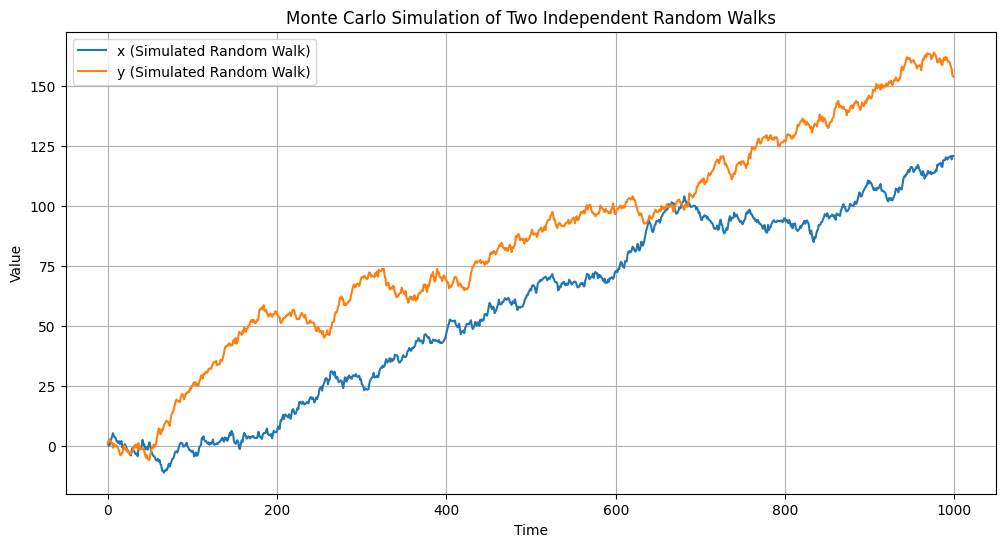

In [14]:
##Spurious regression

# --- 1. Define Parameters from the Regression ---
# (Taken from the Stata output in the provided image)
drift = 0.1226
std_dev = 1.0854
n_observations = 1000

# We need an initial starting value. Let's use the first value
# of i3 from our sample data, which was 1.04.
initial_value_x = 1.04
initial_value_y = 1.04 # Both start from the same point for simplicity

# --- 2. Run the Monte Carlo Simulation ---

# Generate the random shocks for both series
# These are the 'u_t' terms from a normal distribution
shocks_x = np.random.normal(loc=0, scale=std_dev, size=n_observations)
shocks_y = np.random.normal(loc=0, scale=std_dev, size=n_observations)

# Initialize the time series lists with their starting values
x_series = [initial_value_x]
y_series = [initial_value_y]

# Generate the random walks iteratively
for i in range(n_observations - 1):
    # Calculate the next value for x
    next_x = x_series[-1] + drift + shocks_x[i]
    x_series.append(next_x)
    
    # Calculate the next value for y
    next_y = y_series[-1] + drift + shocks_y[i]
    y_series.append(next_y)

# --- 3. Store and Visualize the Results ---

# Create a dataframe to hold the simulated series
simulated_data = pd.DataFrame({
    'x_random_walk': x_series,
    'y_random_walk': y_series
})

print("--- First 10 Simulated Observations ---")
print(simulated_data.head(10))

print(f"\nSuccessfully generated {len(simulated_data)} observations.")

# Plot the two simulated random walks
plt.figure(figsize=(12, 6))
plt.plot(simulated_data.index, simulated_data['x_random_walk'], label='x (Simulated Random Walk)')
plt.plot(simulated_data.index, simulated_data['y_random_walk'], label='y (Simulated Random Walk)')
plt.title('Monte Carlo Simulation of Two Independent Random Walks')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


--- Parameters Estimated from i3 ---
Sample Size (T): 56
Estimated Drift (delta): -0.0004
Estimated Std. Dev. of Shocks (sigma): 1.3675

Running 10 Monte Carlo replications...
Simulation for 10 replications complete.

Running 100 Monte Carlo replications...
Simulation for 100 replications complete.

Running 1000 Monte Carlo replications...


C:\Users\daves\AppData\Local\Temp\ipykernel_2872\3881462914.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  drift = drift_model.params[0]


Simulation for 1000 replications complete.

Running 10000 Monte Carlo replications...
Simulation for 10000 replications complete.


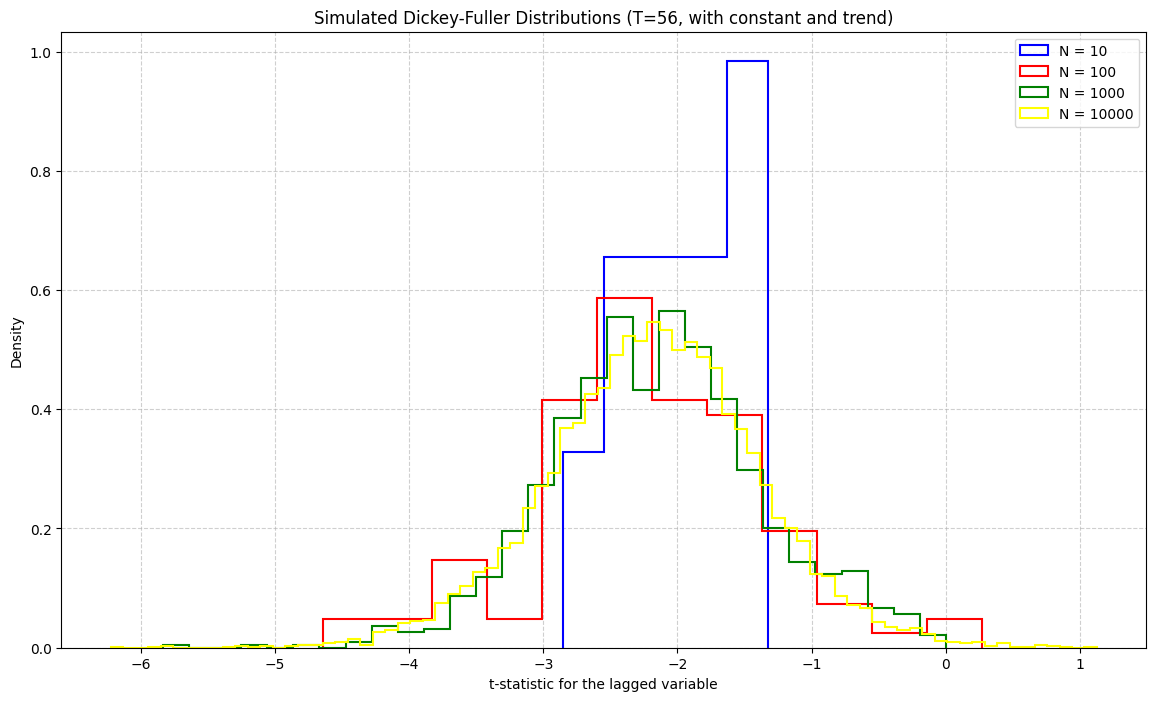


--- Simulated Critical Values by Number of Replications ---

For N = 10:
  1% Critical Value: -2.8221
  5% Critical Value: -2.6994
  10% Critical Value: -2.5460

For N = 100:
  1% Critical Value: -4.2496
  5% Critical Value: -3.7426
  10% Critical Value: -3.3270

For N = 1000:
  1% Critical Value: -4.1085
  5% Critical Value: -3.3931
  10% Critical Value: -3.1180

For N = 10000:
  1% Critical Value: -4.1145
  5% Critical Value: -3.5115
  10% Critical Value: -3.1806


In [15]:
## Generating the Dickey-Fuller Distribution

# --- 1. Estimate Parameters from the real 'i3' data ---
# This makes the simulation specific to the i3 series.

# Get the sample size T
T = len(intdef)

# Calculate the change in i3 (the dependent variable for the drift regression)
delta_i3 = intdef['i3'].diff().dropna()

# Regress the change in i3 on a constant to find the drift and standard deviation
X_drift = sm.add_constant(np.ones(len(delta_i3)))
drift_model = sm.OLS(delta_i3, X_drift).fit()

# The drift is the average change in i3
drift = drift_model.params[0]
# The standard deviation of the shocks is the model's Root Mean Squared Error
std_dev = np.sqrt(drift_model.mse_resid)

print("\n--- Parameters Estimated from i3 ---")
print(f"Sample Size (T): {T}")
print(f"Estimated Drift (delta): {drift:.4f}")
print(f"Estimated Std. Dev. of Shocks (sigma): {std_dev:.4f}")


# --- 2. Simulation Parameters ---
replication_counts = [10, 100, 1000, 10000]
results_by_replication = {}

# --- 3. Run the Monte Carlo Simulation for each replication count ---
for n_replications in replication_counts:
    print(f"\nRunning {n_replications} Monte Carlo replications...")
    dickey_fuller_t_stats = []
    for i in range(n_replications):
        # a) Generate a random walk with the same properties as i3
        shocks = np.random.normal(loc=0, scale=std_dev, size=T)
        y = np.cumsum(drift + shocks)

        # b) Prepare variables for the Dickey-Fuller test regression
        delta_y = np.diff(y)
        y_lagged = y[:-1]
        time_trend = np.arange(1, T)
        X_test = sm.add_constant(np.column_stack((time_trend, y_lagged)))

        # c) Run the OLS regression for the test
        test_model = sm.OLS(delta_y, X_test)
        results = test_model.fit()

        # d) Store the t-statistic for the lagged variable (theta)
        t_statistic = results.tvalues[2]
        dickey_fuller_t_stats.append(t_statistic)
    
    # Store the results
    results_by_replication[n_replications] = dickey_fuller_t_stats
    print(f"Simulation for {n_replications} replications complete.")

# --- 4. Plot the Distributions ---
plt.figure(figsize=(14, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, n_reps in enumerate(replication_counts):
    plt.hist(results_by_replication[n_reps], bins='auto', density=True, 
             histtype='step', linewidth=1.5, color=colors[i], 
             label=f'N = {n_reps}')

plt.title(f'Simulated Dickey-Fuller Distributions (T={T}, with constant and trend)')
plt.xlabel('t-statistic for the lagged variable')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 5. Print Simulated Critical Values for each run ---
print("\n--- Simulated Critical Values by Number of Replications ---")
for n_reps, t_stats in results_by_replication.items():
    crit_val_1 = np.percentile(t_stats, 1)
    crit_val_5 = np.percentile(t_stats, 5)
    crit_val_10 = np.percentile(t_stats, 10)
    print(f"\nFor N = {n_reps}:")
    print(f"  1% Critical Value: {crit_val_1:.4f}")
    print(f"  5% Critical Value: {crit_val_5:.4f}")
    print(f"  10% Critical Value: {crit_val_10:.4f}")


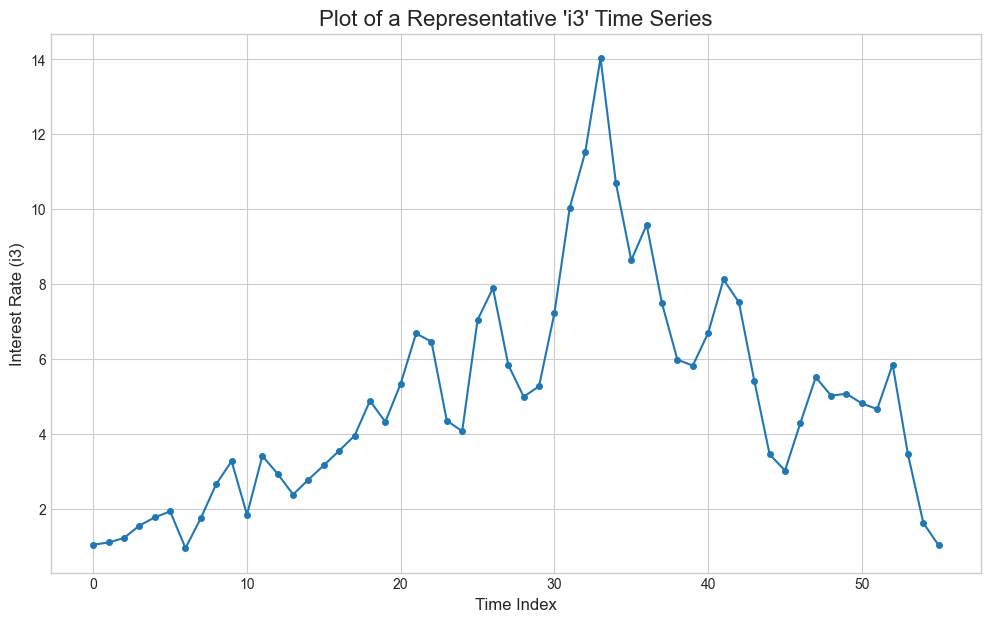

In [16]:
## Dickey-Fuller Tests 

#Plot the data to visualize the trend and select the test
#Drifts up and down around a general upward/downward slope: Use the test with a constant and trend.
#Drift around a flat, non-zero average: Use the test with a constant only.
#Drift around zero? Use the test with no constant or trend. (This is rare).



# --- Plotting the 'i3' Series ---
plt.style.use('seaborn-v0_8-whitegrid') # Using a nice style for the plot
plt.figure(figsize=(12, 7))

# Corrected plotting command
plt.plot(intdef['time_index'], intdef['i3'], marker='o', linestyle='-', markersize=4)

plt.title('Plot of a Representative \'i3\' Time Series', fontsize=16)
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Interest Rate (i3)', fontsize=12)
plt.grid(True)

plt.show()


In [17]:
# --- Implementation of the Three Tests ---

print("--- Dickey-Fuller Tests for the 'i3' variable ---")

#---------------------------------------------------------------------
# Test 1: No constant, no trend (Model: Random Walk)
#---------------------------------------------------------------------
# Regression: Δy_t = θ*y_{t-1} + ε_t
# H0: The series is a simple random walk (without drift).
# Ha: The series is stationary with a zero mean, what means that there is no unit root.

print("\n--- Test 1: No Constant, No Trend ---")
df_test_1 = adfuller(intdef['i3'], regression='n', autolag=None)
print(f'DF Test Statistic: {df_test_1[0]:.4f}')
print(f'p-value: {df_test_1[1]:.4f}')
print('Critical Values:')
for key, value in df_test_1[4].items():
    print(f'\t{key}: {value:.4f}')

#---------------------------------------------------------------------
# Test 2: Constant, no trend (Model: Random Walk with Drift)
#---------------------------------------------------------------------
# Regression: Δy_t = β_0 + θ*y_{t-1} + ε_t
# H0: The series is a random walk with a possible drift.
# Ha: The series is stationary around a non-zero mean, what means that there is no unit root.

print("\n--- Test 2: Constant, No Trend ---")
df_test_2 = adfuller(intdef['i3'], regression='c', autolag=None)
print(f'DF Test Statistic: {df_test_2[0]:.4f}')
print(f'p-value: {df_test_2[1]:.4f}')
print('Critical Values:')
for key, value in df_test_2[4].items():
    print(f'\t{key}: {value:.4f}')

#---------------------------------------------------------------------
# Test 3: Constant and trend (Model: Random Walk with Drift and Trend)
#---------------------------------------------------------------------
# Regression: Δy_t = β_0 + β_1*t + θ*y_{t-1} + ε_t
# H0: The series is a random walk with drift around a linear time trend.
# Ha: The series is stationary around a linear time trend, what means that there is no unit root.

print("\n--- Test 3: Constant and Trend ---")
df_test_3 = adfuller(intdef['i3'], regression='ct', autolag=None)
print(f'DF Test Statistic: {df_test_3[0]:.4f}')
print(f'p-value: {df_test_3[1]:.4f}')
print('Critical Values:')
for key, value in df_test_3[4].items():
    print(f'\t{key}: {value:.4f}')

--- Dickey-Fuller Tests for the 'i3' variable ---

--- Test 1: No Constant, No Trend ---
DF Test Statistic: -0.7633
p-value: 0.3859
Critical Values:
	1%: -2.6184
	5%: -1.9485
	10%: -1.6119

--- Test 2: Constant, No Trend ---
DF Test Statistic: -1.5078
p-value: 0.5296
Critical Values:
	1%: -3.5886
	5%: -2.9299
	10%: -2.6032

--- Test 3: Constant and Trend ---
DF Test Statistic: -0.8803
p-value: 0.9582
Critical Values:
	1%: -4.1808
	5%: -3.5155
	10%: -3.1881


In [18]:
## Augmented Dickey-Fuller Test with Automatic Lag Selection

# --- Method 1: Automatic Lag Selection using 'adfuller' ---
# This is the easiest and most common approach.
print("--- Method 1: Automatic Lag Selection (using AIC) ---")

# Let's assume a maxlag of 6 and let the function find the best one based on AIC.
# We'll use the model with a constant ('c')
adf_result_auto = adfuller(intdef['i3'], regression='c', maxlag=6, autolag='AIC')

print(f"Chosen Lag Length: {adf_result_auto[2]}")
print(f'ADF Test Statistic: {adf_result_auto[0]:.4f}')
print(f'p-value: {adf_result_auto[1]:.4f}')
print('Critical Values:')
for key, value in adf_result_auto[4].items():
    print(f'\t{key}: {value:.4f}')

# --- Method 2: Manual "General-to-Specific" Selection ---
# This replicates the process shown in your images.
print("\n--- Method 2: Manual 'General-to-Specific' Lag Selection ---")

# Prepare the data
delta_i3 = intdef['i3'].diff().dropna()
i3_lagged = intdef['i3'].shift(1).dropna()
# Align data
delta_i3 = delta_i3.iloc[1:]
i3_lagged = i3_lagged.iloc[1:]

max_lags = 4 ## Maximum number of lags to test
for p in range(max_lags, 0, -1):
    print(f"\nTesting with {p} lags...")
    
    # Create lagged delta terms
    lagged_deltas = pd.concat([delta_i3.shift(i) for i in range(1, p + 1)], axis=1)
    lagged_deltas.columns = [f'delta_i3_lag_{i}' for i in range(1, p + 1)]
    
    # Combine all variables and drop NaNs
    X = pd.concat([i3_lagged, lagged_deltas], axis=1).dropna()
    y = delta_i3.reindex(X.index)
    X = sm.add_constant(X)
    
    # Run OLS
    model = sm.OLS(y, X).fit()
    
    # Check t-statistic of the last lag
    last_lag_t_stat = model.tvalues.iloc[-1]
    
    print(f"T-statistic for lag {p}: {last_lag_t_stat:.4f}")
    
    if abs(last_lag_t_stat) > 1.6:  # Using a rough cutoff of 1.6
        print(f"Lag {p} is significant. Selected lag length is {p}.")
        final_model_summary = model.summary()
        break
    else:
        print(f"Lag {p} is not significant. Reducing lags.")
else: # This 'else' belongs to the 'for' loop
    print("\nNo significant lags found. Running the test with 0 lags (standard DF test).")
    X = sm.add_constant(i3_lagged)
    y = delta_i3
    final_model_summary = sm.OLS(y,X).fit().summary()


print("\n--- Final ADF Test Regression Summary (Manual Method) ---")
print(final_model_summary)

--- Method 1: Automatic Lag Selection (using AIC) ---
Chosen Lag Length: 2
ADF Test Statistic: -1.7794
p-value: 0.3907
Critical Values:
	1%: -3.5602
	5%: -2.9179
	10%: -2.5968

--- Method 2: Manual 'General-to-Specific' Lag Selection ---

Testing with 4 lags...
T-statistic for lag 4: -0.6118
Lag 4 is not significant. Reducing lags.

Testing with 3 lags...
T-statistic for lag 3: -0.2126
Lag 3 is not significant. Reducing lags.

Testing with 2 lags...
T-statistic for lag 2: -1.7746
Lag 2 is significant. Selected lag length is 2.

--- Final ADF Test Regression Summary (Manual Method) ---
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     3.749
Date:                qua, 11 jun 2025   Prob (F-statistic):             0.0169
Time:        

In [19]:
## Test with MA Component

# We choose the model with a constant 'c' and trend 'ct'.
# The lag selection method is now correctly in: 'aic'.

dfgls_test = DFGLS(intdef['i3'], trend='ct', method='aic', max_lags=6)

# Print the results
print(dfgls_test.summary().as_text())
# You can also access the key results directly
print("\n--- Key Results ---")
print(f"Test Statistic: {dfgls_test.stat:.4f}")
print(f"P-value: {dfgls_test.pvalue:.4f}")
print(f"Lags Used: {dfgls_test.lags}")

      Dickey-Fuller GLS Results      
Test Statistic                 -1.424
P-value                         0.626
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.81 (1%), -3.19 (5%), -2.89 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

--- Key Results ---
Test Statistic: -1.4240
P-value: 0.6257
Lags Used: 2


In [20]:
## Dickey and Pantula (1987)

##Define a function to run the Dickey-Pantula test
def run_dickey_pantula(series, max_roots):
    """
    Performs a sequential Dickey-Pantula test to determine the order of integration.
    
    The function tests downwards from the specified maximum number of unit roots.
    It stops and reports the final conclusion as soon as it fails to reject a 
    null hypothesis. If all null hypotheses are rejected, it concludes the series
    is stationary (I(0)).

    Args:
        series (pd.Series): The time series to be tested.
        max_roots (int): The maximum number of unit roots to test for (e.g., 3 for I(3)).
    """
    print(f"--- Dickey-Pantula Test starting from a max of {max_roots} unit roots ---")

    # Prepare all necessary differenced series in advance
    diffs = [series.diff(i) for i in range(max_roots + 2)]
    
    # Start the sequential test from the maximum specified order
    k = max_roots
    while k > 0:
        print(f"\n--- Step: Testing H0: {k} Unit Roots vs. H1: {k-1} Unit Roots ---")

        # Dependent variable is the k-th difference
        y = diffs[k].dropna()

        # Build the set of independent variables for the regression
        X_df = pd.DataFrame({'level_lag_k': series.shift(k)})
        for i in range(1, k):
            X_df[f'diff_lag_{i}'] = diffs[i].shift(k - i)

        # Drop NaNs and use .copy() to avoid SettingWithCopyWarning
        X = X_df.dropna().copy()
        y = y.reindex(X.index)

        # Add constant and trend
        X['time_trend'] = np.arange(len(X))
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()
        t_stat_level = model.tvalues['level_lag_k']

        print(f"Test regression: Δ^{k}y on y_{{-{k}}}, ..., const, trend")
        print(f"Test statistic on y_{{-{k}}} coefficient: {t_stat_level:.4f}")

        # Use appropriate critical values for the test
        if k == 1:
            adf_test_full = sm.tsa.adfuller(series, regression='ct')
            crit_vals = adf_test_full[4]
            print("Comparing to standard ADF critical values (with trend):")
            for key, value in crit_vals.items():
                print(f'\t{key}: {value:.4f}')
        else:
            print(f"Comparing to special Dickey-Pantula critical values for I({k}) vs I({k-1}).")
            # For k>1, special critical values are needed. Using a placeholder for demonstration.
            crit_vals = {'5%': -4.0}

        # --- Core Decision Logic ---
        # Explicitly print the comparison being made
        print(f"\nDecision: Comparing test statistic ({t_stat_level:.4f}) to the 5% critical value ({crit_vals['5%']:.4f}).")
        
        # If we FAIL to reject H0, we have found our answer and stop the test.
        if t_stat_level > crit_vals['5%']:
            print(f"Conclusion: Failed to reject H0. The series appears to have {k} unit root(s).")
            
            # Final check for trend significance, but only if we conclude the series is I(1)
            if k == 1:
                p_value_trend = model.pvalues['time_trend']
                print(f"\nFinal step: Testing trend significance for I(1) series...")
                print(f"P-value for the trend term: {p_value_trend:.4f}")
                if p_value_trend < 0.05:
                    print("Final Determination: The series is I(1) with a significant deterministic trend.")
                else:
                    print("Final Determination: The series is I(1) without a significant trend (a random walk with drift).")
            
            print("Stopping the sequential test.")
            return # Exit the function entirely
            
        # If we reach this point, it means we REJECTED H0.
        # We continue to the next, simpler test.
        print(f"Conclusion: Rejected H0 of {k} unit roots. The series has fewer than {k} root(s).")
        k -= 1
    
    # This part is only reached if the loop completes, meaning we rejected H0 for k=1.
    print("\n" + "="*50)
    print("Final Determination: The procedure has rejected the null hypothesis at every step.")
    print("The series appears to have no unit roots and is stationary (I(0)).")
    print("="*50)

# --- Run the Test by Calling the Function Once ---
run_dickey_pantula(intdef['i3'], max_roots=2)



--- Dickey-Pantula Test starting from a max of 2 unit roots ---

--- Step: Testing H0: 2 Unit Roots vs. H1: 1 Unit Roots ---
Test regression: Δ^2y on y_{-2}, ..., const, trend
Test statistic on y_{-2} coefficient: -1.9662
Comparing to special Dickey-Pantula critical values for I(2) vs I(1).

Decision: Comparing test statistic (-1.9662) to the 5% critical value (-4.0000).
Conclusion: Failed to reject H0. The series appears to have 2 unit root(s).
Stopping the sequential test.


In [21]:
##Load data
barium = wd.data('barium')
barium
print(barium.columns)

Index(['chnimp', 'bchlimp', 'befile6', 'affile6', 'afdec6', 'befile12',
       'affile12', 'afdec12', 'chempi', 'gas', 'rtwex', 'spr', 'sum', 'fall',
       'lchnimp', 'lgas', 'lrtwex', 'lchempi', 't', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'percchn'],
      dtype='object')


In [22]:
# Seasonal unit roots

# --- 1. Data Preparation Code ---
# This part correctly prepares all the necessary columns.
# The existing dummy variables are kept.
barium_indexed = barium.set_index('t')
barium_indexed['y_val'] = barium_indexed['lchnimp']
barium_indexed['dy_val'] = barium_indexed['y_val'].diff()
barium_indexed['y_val_lag1'] = barium_indexed['y_val'].shift(1)

for i in range(1, 13):
    column_name = f'dy_val_lag{i}'
    barium_indexed[column_name] = barium_indexed['dy_val'].shift(i)

# --- 2. Data Cleaning ---
# This correctly removes rows with NaNs created by lagging/differencing
barium_indexed.dropna(inplace=True)

print("--- Cleaned DataFrame ready for regression ---")
# Displaying the head to confirm all columns are present
print(barium_indexed.head())
print("-" * 50)


--- Cleaned DataFrame ready for regression ---
        chnimp       bchlimp  befile6  affile6  afdec6  befile12  affile12  \
t                                                                            
14  788.643982  11740.389648        0        0       0         0         0   
15  287.039490  13699.070312        0        0       0         0         0   
16  278.954498  17716.330078        0        0       0         0         0   
17  429.897003  15868.759766        0        0       0         0         0   
18  344.881989  15512.320312        0        0       0         0         0   

    afdec12      chempi           gas  ...  dy_val_lag3  dy_val_lag4  \
t                                      ...                             
14        0  113.000000  8.710000e+09  ...     1.148955    -0.412437   
15        0  113.199997  8.580000e+09  ...    -0.235011     1.148955   
16        0  114.300003  8.900000e+09  ...    -0.708015    -0.235011   
17        0  113.199997  8.880000e+09  ...    

In [23]:
# --- 3. Regression Code ---

# Define the regression formula
lagged_diff_terms = ' + '.join([f'dy_val_lag{i}' for i in range(1, 13)])
dummy_terms = ' + '.join(['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
formula = f'dy_val ~ y_val_lag1 + {lagged_diff_terms} + {dummy_terms}'

print("--- Regression Formula ---")
print(formula)
print("-" * 50)

# Run the OLS regression on your prepared dataframe
model = smf.ols(formula=formula, data=barium_indexed) # The only change is here
results = model.fit()

# Print the regression summary
print("\n--- Regression Results for Equation 4.34 ---")
print(results.summary())           

--- Regression Formula ---
dy_val ~ y_val_lag1 + dy_val_lag1 + dy_val_lag2 + dy_val_lag3 + dy_val_lag4 + dy_val_lag5 + dy_val_lag6 + dy_val_lag7 + dy_val_lag8 + dy_val_lag9 + dy_val_lag10 + dy_val_lag11 + dy_val_lag12 + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec
--------------------------------------------------

--- Regression Results for Equation 4.34 ---
                            OLS Regression Results                            
Dep. Variable:                 dy_val   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.238
Date:                qua, 11 jun 2025   Prob (F-statistic):           2.45e-07
Time:                        14:55:25   Log-Likelihood:                -79.217
No. Observations:                 118   AIC:                             208.4
Df Residuals:                      93   BIC:                      

In [24]:
# Hegy test --- Use the bottom one in R called from Python instead of this

# --- 1. Data Preparation: Aggregate Monthly to Quarterly ---

# Load the monthly barium data
barium = wd.data('barium')
y_monthly = barium['lchnimp']

# Create a proper time index for the data
# The data runs from Feb 1978 to Dec 1988 (131 months)
date_index = pd.date_range(start='1978-02', periods=len(y_monthly), freq='ME')
y_monthly.index = date_index

# Resample the monthly log-series to quarterly by taking the mean
y_quarterly = y_monthly.resample('QE').mean()
df = pd.DataFrame({'y': y_quarterly})

# --- 2. Create HEGY Test Variables ---

# Dependent variable: 4th difference (annual difference for quarterly data)
df['delta4_y'] = df['y'].diff(4)

# Create the HEGY regressors based on the textbook formulas
# y1 represents the non-seasonal component (zero frequency)
df['y1'] = df['y'].rolling(window=4).sum()

# y2 represents the biannual frequency component
df['y2'] = df['y'] - df['y'].shift(1) + df['y'].shift(2) - df['y'].shift(3)

# y3 represents the annual frequency component
df['y3'] = df['y'] - df['y'].shift(2)

# Create the lagged regressors for the test equation
df['y1_lag1'] = df['y1'].shift(1)
df['y2_lag1'] = df['y2'].shift(1)
df['y3_lag1'] = df['y3'].shift(1)
df['y3_lag2'] = df['y3'].shift(2)

# --- 3. Create Deterministic and Augmentation Terms ---

# Create deterministic terms: trend and seasonal dummies
df['trend'] = np.arange(len(df))
df['quarter'] = df.index.quarter
df['Q2'] = (df['quarter'] == 2).astype(int)
df['Q3'] = (df['quarter'] == 3).astype(int)
df['Q4'] = (df['quarter'] == 4).astype(int)

# Create augmentation lags to ensure residuals are white noise
# We'll use 2 lags of the dependent variable
df['delta4_y_lag1'] = df['delta4_y'].shift(1)
df['delta4_y_lag2'] = df['delta4_y'].shift(2)

# --- 4. Run the HEGY Regression ---

# Clean the data by dropping all rows with NaNs from transformations
df.dropna(inplace=True)

# Define the regression formula
# This corresponds to the model with an intercept, trend, and seasonal dummies
formula = 'delta4_y ~ y1_lag1 + y2_lag1 + y3_lag1 + y3_lag2 + delta4_y_lag1 + delta4_y_lag2 + trend + Q2 + Q3 + Q4'

# Run the OLS regression
model = smf.ols(formula=formula, data=df)
results = model.fit()

# --- 5. Display Results and Perform Hypothesis Tests ---

print("--- HEGY Test Regression Results ---")
print(results.summary())
print("-" * 75)

# --- 6. Interpret Hypothesis Test Results ---

print("\n--- Interpretation of Hypothesis Tests (at 5% significance) ---")

# Define significance level and critical values from HEGY tables
# Critical values for a model with trend and seasonal dummies at 5%
alpha = 0.05
# For a sample size of ~50, from Hegy (1990), Table 1, p. 235 from Enders --- confirms these values
cv_pi1 = -3.84
cv_pi2 = -3.28

# Perform the F-test for the annual frequency unit root (H0: π3=0, π4=0)
f_test_annual = results.f_test('y3_lag1 = 0, y3_lag2 = 0')
print(f"F-test for annual unit root (H0: π3=π4=0): F-statistic = {f_test_annual.fvalue:.4f}, p-value = {f_test_annual.pvalue:.4f}")

if f_test_annual.pvalue < alpha:
    print("Decision: Reject H0. The p-value is less than 0.05.")
    print("Meaning: The time series does NOT have a seasonal unit root at the annual frequency. The seasonality is deterministic.")
else:
    print("Decision: Fail to reject H0. The p-value is not less than 0.05.")
    print("Meaning: The time series has a seasonal unit root at the annual frequency. The seasonality is stochastic.")
print("-" * 75)


# Extract t-statistics for the other roots
t_stat_pi1 = results.tvalues['y1_lag1']
t_stat_pi2 = results.tvalues['y2_lag1']

# --- Test for non-seasonal unit root (π1) ---
print(f"t-statistic for non-seasonal root (π1): {t_stat_pi1:.4f} (Critical Value: {cv_pi1})")
if t_stat_pi1 < cv_pi1:
    print("Decision: Reject H0 (t-statistic < critical value).")
    print("Meaning: The time series does NOT have a non-seasonal unit root. The series is trend-stationary.")
else:
    print("Decision: Fail to reject H0 (t-statistic >= critical value).")
    print("Meaning: The time series has a non-seasonal unit root. The series is non-stationary (requires non-seasonal differencing).")
print("-" * 75)


# --- Test for biannual unit root (π2) ---
print(f"t-statistic for biannual root (π2): {t_stat_pi2:.4f} (Critical Value: {cv_pi2})")
if t_stat_pi2 < cv_pi2:
    print("Decision: Reject H0 (t-statistic < critical value).")
    print("Meaning: The time series does NOT have a seasonal unit root at the biannual frequency. This seasonal component is deterministic.")
else:
    print("Decision: Fail to reject H0 (t-statistic >= critical value).")
    print("Meaning: The time series has a seasonal unit root at the biannual frequency. This seasonal component is stochastic.")
print("-" * 75)

--- HEGY Test Regression Results ---
                            OLS Regression Results                            
Dep. Variable:               delta4_y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     10.19
Date:                qua, 11 jun 2025   Prob (F-statistic):           7.76e-07
Time:                        14:55:25   Log-Likelihood:                -7.1812
No. Observations:                  38   AIC:                             36.36
Df Residuals:                      27   BIC:                             54.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept

In [25]:
# Hegy Test in R using uroot package

# --- 1. Setup R environment in Python ---
r_base = importr('base')
r_utils = importr('utils')
r_stats = importr('stats')

try:
    r_base.Sys_setlocale("LC_ALL", "C")
except Exception as e:
    print(f"Could not set R locale, but continuing: {e}")

def install_r_package(package_name):
    """Checks if a package is installed and installs it if not."""
    if not ro.packages.isinstalled(package_name):
        print(f"Installing R package: {package_name}...")
        r_utils.install_packages(package_name, repos="https://cran.r-project.org")
    else:
        print(f"R package '{package_name}' is already installed.")

# Ensure 'uroot' and 'wooldridge' are installed
install_r_package('uroot')
install_r_package('wooldridge')
uroot = importr('uroot')

# --- 2. Data Preparation using Wooldridge 'barium' dataset ---
print("\n--- Preparing 'lchnimp' data from the Wooldridge 'barium' dataset ---")
ro.r('''
    # Load the wooldridge library and the barium dataset
    library(wooldridge)
    data(barium)
    
    # Create a monthly time series object for lchnimp (Feb 1978 to Dec 1988)
    y_monthly_ts <- ts(barium$lchnimp, start = c(1978, 2), frequency = 12)
    
    # The hegy.test is for quarterly data, so we aggregate the monthly
    # series to quarterly by taking the mean of each quarter.
    y_quarterly_ts <- aggregate(y_monthly_ts, nfrequency = 4, FUN = mean)
''')
print("Data preparation complete in R environment.")

# --- 3. Run HEGY test in R ---
print("\n--- Running HEGY Test on 'lchnimp' using uroot::hegy_test ---")
# Get the quarterly data from the R environment
r_y = ro.globalenv['y_quarterly_ts']

# Run the test including constant, trend, and seasonal dummies
hegy_results = uroot.hegy_test(
    r_y,
    deterministic=ro.IntVector([1, 1, 1]),
    lag_method='AIC'
)

# --- 4. Extract and Interpret Results ---
print("\n--- Interpretation of Hypothesis Tests for 'lchnimp' (at 5% significance) ---\n")
alpha = 0.05

# Extract the results vectors by their names from the list
statistics = hegy_results.rx2('statistics')
pvalues = hegy_results.rx2('pvalues')

# --- Test for non-seasonal unit root (π₁) ---
stat_pi1 = statistics.rx('t_1')[0]
pval_pi1 = pvalues.rx('t_1')[0]
print(f"Test for Non-Seasonal Root (H₀: π₁ = 0)")
print(f"t-statistic: {stat_pi1:.4f} | p-value: {pval_pi1:.4f}")

if pval_pi1 < alpha:
    print("Decision: Reject H₀. The series does NOT have a non-seasonal unit root. ✅")
else:
    print("Decision: Fail to reject H₀. The series has a non-seasonal unit root. ❌")

print("-" * 75)

# --- Test for biannual unit root (π₂) ---
stat_pi2 = statistics.rx('t_2')[0]
pval_pi2 = pvalues.rx('t_2')[0]
print(f"Test for Biannual Root (H₀: π₂ = 0)")
print(f"t-statistic: {stat_pi2:.4f} | p-value: {pval_pi2:.4f}")

if pval_pi2 < alpha:
    print("Decision: Reject H₀. The series does NOT have a biannual seasonal unit root. ✅")
else:
    print("Decision: Fail to reject H₀. The series has a biannual seasonal unit root. ❌")

print("-" * 75)

# --- Test for annual unit root (π₃ and π₄) ---
stat_annual = statistics.rx('F_3:4')[0]
pval_annual = pvalues.rx('F_3:4')[0]
print(f"Test for Annual Roots (H₀: π₃ = π₄ = 0)")
print(f"F-statistic: {stat_annual:.4f} | p-value: {pval_annual:.4f}")

if pval_annual < alpha:
    print("Decision: Reject H₀. The series does NOT have an annual seasonal unit root. ✅")
else:
    print("Decision: Fail to reject H₀. The series has an annual seasonal unit root. ❌")

print("-" * 75)

R package 'uroot' is already installed.
R package 'wooldridge' is already installed.

--- Preparing 'lchnimp' data from the Wooldridge 'barium' dataset ---
Data preparation complete in R environment.

--- Running HEGY Test on 'lchnimp' using uroot::hegy_test ---

--- Interpretation of Hypothesis Tests for 'lchnimp' (at 5% significance) ---

Test for Non-Seasonal Root (H₀: π₁ = 0)
t-statistic: -4.1523 | p-value: 1.0000
Decision: Fail to reject H₀. The series has a non-seasonal unit root. ❌
---------------------------------------------------------------------------
Test for Biannual Root (H₀: π₂ = 0)
t-statistic: -4.2106 | p-value: 1.0000
Decision: Fail to reject H₀. The series has a biannual seasonal unit root. ❌
---------------------------------------------------------------------------
Test for Annual Roots (H₀: π₃ = π₄ = 0)
F-statistic: 18.6445 | p-value: 0.9959
Decision: Fail to reject H₀. The series has an annual seasonal unit root. ❌
-----------------------------------------------

C:\Users\daves\AppData\Local\Temp\ipykernel_2872\2527855749.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_index = pd.date_range(start='1978-02', periods=len(y), freq='M')


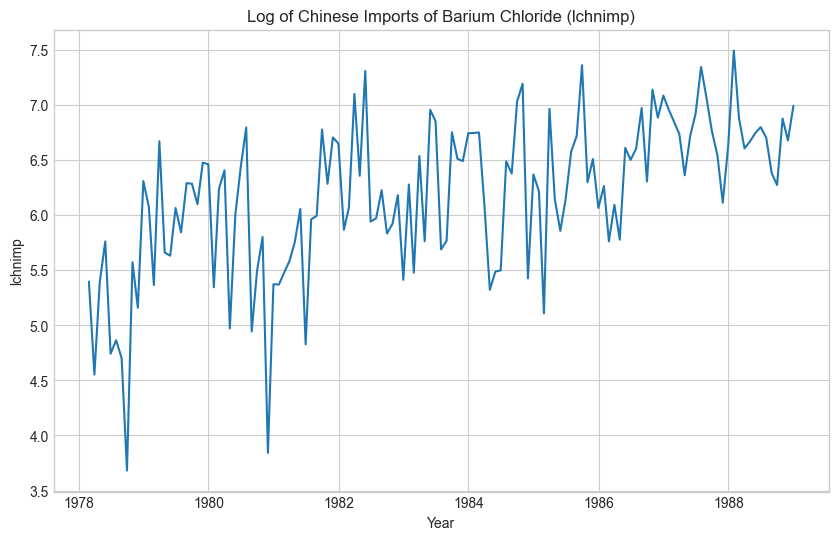

In [26]:
##Perron´s Test for a Unit Root in the Presence of a Structural Break

# Load the data
barium = wd.data('barium')
y = barium['lchnimp']

# Create a time index for plotting
# Data is from Feb 1978 to Dec 1988 (131 months)
date_index = pd.date_range(start='1978-02', periods=len(y), freq='M')
y.index = date_index

# Plot the data to identify a potential structural break
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title('Log of Chinese Imports of Barium Chloride (lchnimp)')
plt.xlabel('Year')
plt.ylabel('lchnimp')
plt.grid(True)
plt.show()


In [27]:
## From the plot, a distinct change in the trend appears to begin around late 1983 / early 1984. 
# We will select January 1984 as our break date.
fstring = "January 1984 as the break date (t=71)"

# --- 1. Data Preparation ---

# Load the data and create the time series object
barium = wd.data('barium')
y = barium['lchnimp']
date_index = pd.date_range(start='1978-02', periods=len(y), freq='ME')
y.index = date_index

# Create a DataFrame for the regression
df = pd.DataFrame({'y': y})
df['trend'] = np.arange(1, len(df) + 1)

# --- 2. Model Specification ---

# Set the break date (tau) based on visual inspection
# Jan 1984 is the 72nd data point, so the break occurs after t=71
tau = 71

# Create dummy variables for a break in intercept (D_L) and trend (D_S)
df['D_L'] = (df['trend'] > tau).astype(int)
df['D_S'] = (df['trend'] - tau) * (df['trend'] > tau).astype(int)

# Create lagged and differenced variables
df['y_lag1'] = df['y'].shift(1)
df['delta_y'] = df['y'].diff(1)

# Set the number of augmentation lags to 2 to match the specified output
k = 2
for i in range(1, k + 1):
    df[f'delta_y_lag{i}'] = df['delta_y'].shift(i)

# --- 3. Run the Perron Test Regression ---

# Define the final regression formula
lag_terms = ' + '.join([f'delta_y_lag{i}' for i in range(1, k + 1)])
final_formula = f'y ~ y_lag1 + trend + D_L + D_S + {lag_terms}'

# Drop rows with NaN values created by lagging/differencing
df.dropna(inplace=True)

# Run the OLS regression and store the results
results = smf.ols(formula=final_formula, data=df).fit()

# --- 4. Custom Output for Clarification ---

# Extract key values from the regression results
rho_hat = results.params['y_lag1']
se_rho_hat = results.bse['y_lag1']
perron_t_stat = (rho_hat - 1) / se_rho_hat

# Define critical values for Perron's Model C with lambda ~ 0.5
crit_val_1pct = -4.52
crit_val_5pct = -3.95

# Print the structured and clarified output
print("="*60)
print(" Perron's Test for Structural Break: Analysis and Conclusion")
print("="*60)
print("\n--- 1. Test Objective ---")
print("To test for a unit root (random walk behavior) in the 'lchnimp' series,")
print("while accounting for a potential structural break in 1984.")
print(f"H0: The series has a unit root (is non-stationary).")
print(f"HA: The series is stationary around a trend with a structural break.")

print("\n--- 2. Model Specification ---")
print(f"  - Series:           lchnimp")
print(f"  - Break Date (τ):   t=71 (January 1984)")
print(f"  - Break Fraction (λ): {tau/len(barium):.2f}")
print(f"  - Perron Model:     Model C (Break in Intercept and Trend)")
print(f"  - Augmentation Lags (k): {k}")

print("\n--- 3. Calculation of the Test Statistic ---")
print("The standard t-statistic in the table tests if ρ = 0.")
print("For a unit root test, we must test if ρ = 1.")
print("\nFormula: t = (ρ_hat - 1) / SE(ρ_hat)")
print(f"  - Estimated ρ (y_lag1 coef):   {rho_hat:.4f}")
print(f"  - Standard Error of ρ:         {se_rho_hat:.4f}")
print(f"  - Calculation:                 ({rho_hat:.4f} - 1) / {se_rho_hat:.4f}")
print(f"  - Perron Test t-statistic:     {perron_t_stat:.4f}")

print("\n--- 4. Comparison to Critical Values ---")
print(f"  - Calculated Test Statistic:   {perron_t_stat:.4f}")
print(f"  - 1% Critical Value:           {crit_val_1pct}")
print(f"  - 5% Critical Value:           {crit_val_5pct}")

print("\n--- 5. Final Conclusion ---")

# The calculated test statistic from your code
perron_t_stat = (results.params['y_lag1'] - 1) / results.bse['y_lag1']

if perron_t_stat < crit_val_1pct:
    print("Decision: Reject the null hypothesis at the 1% significance level.")
    print("\nInterpretation:")
    print("The test statistic is more negative than the 1% critical value, providing strong")
    print("evidence against the null hypothesis of a unit root.")
    print("\nThis means the series is NOT a random walk. It is best described as")
    print("a **trend-stationary process** that experienced a major structural shift in")
    print(f"both its level and its growth rate around {fstring}.")

elif perron_t_stat < crit_val_5pct:
    print("Decision: Reject the null hypothesis at the 5% significance level.")
    print("\nInterpretation:")
    print("The test statistic is more negative than the 5% critical value but not the 1%")
    print("critical value. This provides significant evidence against the null hypothesis of a unit root.")
    print("\nThis means the series is likely NOT a random walk. It is best described as")
    print("a **trend-stationary process** that experienced a major structural shift in")
    print(f"both its level and its growth rate around {fstring}.")

else:
    print("Decision: Fail to reject the null hypothesis.")
    print("\nInterpretation:")
    print("The test statistic is less negative than the 5% critical value. There is insufficient")
    print("evidence to reject the null hypothesis of a unit root.")
    print("\nThis means the series is best treated as a **non-stationary process** (a random walk).")
    print(f"The apparent structural shift around {fstring} was not sufficient")
    print("to make the series stationary around a broken trend.")

print("="*60)


 Perron's Test for Structural Break: Analysis and Conclusion

--- 1. Test Objective ---
To test for a unit root (random walk behavior) in the 'lchnimp' series,
while accounting for a potential structural break in 1984.
H0: The series has a unit root (is non-stationary).
HA: The series is stationary around a trend with a structural break.

--- 2. Model Specification ---
  - Series:           lchnimp
  - Break Date (τ):   t=71 (January 1984)
  - Break Fraction (λ): 0.54
  - Perron Model:     Model C (Break in Intercept and Trend)
  - Augmentation Lags (k): 2

--- 3. Calculation of the Test Statistic ---
The standard t-statistic in the table tests if ρ = 0.
For a unit root test, we must test if ρ = 1.

Formula: t = (ρ_hat - 1) / SE(ρ_hat)
  - Estimated ρ (y_lag1 coef):   0.3841
  - Standard Error of ρ:         0.1268
  - Calculation:                 (0.3841 - 1) / 0.1268
  - Perron Test t-statistic:     -4.8594

--- 4. Comparison to Critical Values ---
  - Calculated Test Statistic:   -4.

In [28]:
## KPSS Test for Trend Stationarity 

## Ljung-Box Test for Serial Correlation
# --- Setup ---
# Define the significance level
alpha = 0.05

# Load the barium dataset
barium_df = wd.data('barium')

# Select the time series variable (log of Chinese imports)
y = barium_df['lchnimp']

# --- Step 1: Test for Serial Correlation (Ljung-Box Test) ---
print("--- Step 1: Ljung-Box Test for Serial Correlation ---")

# Create trend and intercept to get residuals
X = pd.DataFrame({
    'intercept': 1,
    'trend': range(1, len(y) + 1)
})
model = sm.OLS(y, X).fit()
residuals = model.resid

# Perform the Ljung-Box test
# H0: The residuals are independently distributed (no serial correlation).
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_pvalue = ljung_box_results['lb_pvalue'].iloc[0]

print(f"Ljung-Box Test p-value: {ljung_box_pvalue:.4f}")

# Use an 'if' condition to interpret the result
if ljung_box_pvalue < alpha:
    print(f"Conclusion: The p-value is less than {alpha}, so we reject H0.")
    print(">> There IS significant serial correlation in the residuals. A robust test is needed.\n")
else:
    print(f"Conclusion: The p-value is not less than {alpha}, so we fail to reject H0.")
    print(">> There is NO evidence of serial correlation.\n")

--- Step 1: Ljung-Box Test for Serial Correlation ---
Ljung-Box Test p-value: 0.0327
Conclusion: The p-value is less than 0.05, so we reject H0.
>> There IS significant serial correlation in the residuals. A robust test is needed.



In [29]:
# --- Step 2: Test for Stationarity (KPSS Test) ---
print("--- Step 2: KPSS Test for Trend Stationarity ---")

# Perform the KPSS test
# H0: The series is trend-stationary.
kpss_stat, kpss_pvalue, lags, crit_vals = kpss(y, regression='c', nlags='auto') 
kpss_stat2, kpss_pvalue2, lags2, crit_vals2 = kpss(y, regression='ct', nlags='auto') 
# nalgs='auto' selects the number of lags automatically and handles with autocorrelation
#regression='ct' includes a constant and a trend in the test
#regression='c' would only include a constant

print(f"KPSS Test Statistic for a constant: {kpss_stat:.4f}")
print(f"KPSS Test p-value: {kpss_pvalue:.4f}")

# Use an 'if' condition to interpret the result
if kpss_pvalue < alpha:
    print(f"Conclusion: The p-value is less than {alpha}, so we reject H0.")
    print(">> The series is NOT stationary and likely contains a unit root.")
    print("--------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------")
else:
    print(f"Conclusion: The p-value is not less than {alpha}, so we fail to reject H0.")
    print(">> The series IS considered trend-stationary.")
    print("--------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------")

print(f"KPSS Test Statistic for a constant and a trend: {kpss_stat2:.4f}")
print(f"KPSS Test p-value: {kpss_pvalue2:.4f}")

# Use an 'if' condition to interpret the result
if kpss_pvalue2 < alpha:
    print(f"Conclusion: The p-value is less than {alpha}, so we reject H0.")
    print(">> The series is NOT stationary and likely contains a unit root.")
else:
    print(f"Conclusion: The p-value is not less than {alpha}, so we fail to reject H0.")
    print(">> The series IS considered trend-stationary.")
    print("--------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------")

--- Step 2: KPSS Test for Trend Stationarity ---
KPSS Test Statistic for a constant: 1.4358
KPSS Test p-value: 0.0100
Conclusion: The p-value is less than 0.05, so we reject H0.
>> The series is NOT stationary and likely contains a unit root.
--------------------------------------------------------------------------
--------------------------------------------------------------------------
KPSS Test Statistic for a constant and a trend: 0.0522
KPSS Test p-value: 0.1000
Conclusion: The p-value is not less than 0.05, so we fail to reject H0.
>> The series IS considered trend-stationary.
--------------------------------------------------------------------------
--------------------------------------------------------------------------


C:\Users\daves\AppData\Local\Temp\ipykernel_2872\3803370150.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_pvalue, lags, crit_vals = kpss(y, regression='c', nlags='auto')
C:\Users\daves\AppData\Local\Temp\ipykernel_2872\3803370150.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat2, kpss_pvalue2, lags2, crit_vals2 = kpss(y, regression='ct', nlags='auto')


In [30]:
## ERS test for Unit Roots in R called from Python

# --- 1. Setup R environment in Python ---
print("--- Setting up R environment ---")
base = importr('base')
utils = importr('utils')

def install_r_package(package_name):
    if not ro.packages.isinstalled(package_name):
        print(f"Installing R package: {package_name}...")
        utils.install_packages(package_name, repos="https://cran.r-project.org")
    else:
        print(f"R package '{package_name}' is already installed.")

install_r_package('urca')
install_r_package('wooldridge')
urca = importr('urca')
print("R setup complete.")

# --- 2. Data Preparation entirely in R ---
print("\n--- Loading 'barium' dataset and preparing 'lchnimp' series in R ---")
ro.r('''
    # Load the barium dataset from the wooldridge library
    data(barium)
    # Create a time series object for the 'lchnimp' variable
    lchnimp_ts <- ts(barium$lchnimp, start = c(1978, 2), frequency = 12)
''')
print("Data preparation in R complete.")

# Retrieve the R time series object
r_lchnimp_ts = ro.globalenv['lchnimp_ts']

# --- 3. Run ERS test for both models ---
print("\n--- Running ERS Tests for both models ---")

# Model 1: Constant and Trend ('trend')
ers_results_ct = urca.ur_ers(r_lchnimp_ts, type='P-test', model='trend', lag_max=4)

# Model 2: Constant Only ('constant')
ers_results_c = urca.ur_ers(r_lchnimp_ts, type='P-test', model='constant', lag_max=4)

print("Tests complete.")


# --- 4. Provide Final Interpretation for both ---
def interpret_ers_results(results, model_type):
    """Helper function to extract and print ERS test interpretation."""
    test_statistic = results.slots['teststat'][0]
    critical_values = results.slots['cval']
    cv_5_percent = critical_values[1]

    print("\n" + "="*55)
    print(f"       Results for Model with: {model_type}")
    print("="*55)
    print(f"Null Hypothesis (H₀): The series has a unit root.")
    print("-" * 55)
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"5% Critical Value: {cv_5_percent:.4f}")
    print("\n--- Conclusion ---")
    
    if test_statistic < cv_5_percent:
        print("Decision: Reject H₀ ✅")
        print("Meaning: The series is likely stationary (around a trend or constant).")
    else:
        print("Decision: Fail to reject H₀ ❌")
        print("Meaning: The series likely has a unit root and is non-stationary.")
    print("="*55)

# Interpret and print results for both tests
interpret_ers_results(ers_results_ct, "Constant and Time Trend ('ct')")
interpret_ers_results(ers_results_c, "Constant Only ('c')")

--- Setting up R environment ---
R package 'urca' is already installed.
R package 'wooldridge' is already installed.
R setup complete.

--- Loading 'barium' dataset and preparing 'lchnimp' series in R ---
Data preparation in R complete.

--- Running ERS Tests for both models ---
Tests complete.

       Results for Model with: Constant and Time Trend ('ct')
Null Hypothesis (H₀): The series has a unit root.
-------------------------------------------------------
Test Statistic: 3.5798
5% Critical Value: 5.6600

--- Conclusion ---
Decision: Reject H₀ ✅
Meaning: The series is likely stationary (around a trend or constant).

       Results for Model with: Constant Only ('c')
Null Hypothesis (H₀): The series has a unit root.
-------------------------------------------------------
Test Statistic: 3.5129
5% Critical Value: 3.1700

--- Conclusion ---
Decision: Fail to reject H₀ ❌
Meaning: The series likely has a unit root and is non-stationary.


In [31]:
wagepan_info = wd.data('wagepan', description=True) ## describing dataset
print("\n--- Wagepan Dataset Information ---")

name of dataset: wagepan
no of variables: 44
no of observations: 4360

+----------+------------------------+
| variable | label                  |
+----------+------------------------+
| nr       | person identifier      |
| year     | 1980 to 1987           |
| agric    | =1 if in agriculture   |
| black    | =1 if black            |
| bus      |                        |
| construc | =1 if in construction  |
| ent      |                        |
| exper    | labor mkt experience   |
| fin      |                        |
| hisp     | =1 if Hispanic         |
| poorhlth | =1 if in poor health   |
| hours    | annual hours worked    |
| manuf    | =1 if in manufacturing |
| married  | =1 if married          |
| min      |                        |
| nrthcen  | =1 if north central    |
| nrtheast | =1 if north east       |
| occ1     |                        |
| occ2     |                        |
| occ3     |                        |
| occ4     |                        |
| occ5     |     

In [32]:
# Panel root tests

##IPS test for panel unit roots require balanced panel

# --- 1. Set up the rpy2 Environment ---
# Import the 'plm' R library, which contains the testing function.
try:
    plm = importr('plm')
except ro.packages.PackageNotInstalledError:
    print("Error: The R package 'plm' is not installed.")
    print("Please open R and run: install.packages('plm')")
    exit()

# --- 2. Load Data in Python ---
# Load the 'wagepan' dataset using the wooldridge Python library.
wagepan_df = wd.data('wagepan')
print("Dataset 'wagepan' loaded successfully in Python.")
print(f"DataFrame dimensions: {wagepan_df.shape[0]} rows, {wagepan_df.shape[1]} columns.")
print("-" * 50)

# --- 3. Run the Test in R via Python ---
# This block defines and executes the R code.
try:
    # Use the 'localconverter' context manager for robust data type conversion.
    with cv.localconverter(ro.default_converter + pandas2ri.converter):
      # Assign the pandas DataFrame to a variable in R's global environment.
      ro.r.assign("wagepan_r", wagepan_df)

    # Define the R code block as a multi-line string.
    # The wagepan dataset is balanced, but keeping pmax is good practice.
    r_script = """
    # Convert the data.frame to a panel data format (pdata.frame).
    p_wagepan <- pdata.frame(wagepan_r, index = c("nr", "year"))

    # Perform the Im-Pesaran-Shin (IPS) panel unit root test on the 'lwage' variable.
    # The other variables (hours, black, hisp) are not used in the unit root test itself,
    # but would be used in a subsequent regression model after checking for stationarity.
    ips_test <- purtest(p_wagepan$lwage,
                        test = "ips",
                        exo = "intercept",
                        lags = "AIC",
                        pmax = 2)

    # Capture the summary of the test results for display.
    summary(ips_test)
    """

    # Execute the R code string and store the result.
    test_results = ro.r(r_script)

    # --- 4. Display and Interpret the Results ---
    print("📊 Panel Unit Root Test Results for 'lwage' (Im-Pesaran-Shin)")
    print("-" * 50)
    print(test_results)
    print("-" * 50)

    # Extract the p-value and test statistic for a clear interpretation.
    p_value = test_results.rx2('statistic').rx2('p.value')[0]
    test_statistic = test_results.rx2('statistic').rx2('statistic')[0]

    print("\n### Interpretation of the Result ###")
    print("="*55)
    print(f"Null Hypothesis (H₀): All series of 'lwage' have a unit root (non-stationary).")
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("-"*55)

    # Decision rule based on p-value
    if p_value < 0.05:
        print("Decision: Reject H₀ ✅")
        print("Meaning: The data provides strong evidence that at least one individual's 'lwage' series is stationary.")
    else:
        print("Decision: Fail to reject H₀ ❌")
        print("Meaning: There is not enough evidence to conclude that any of the 'lwage' series are stationary. We treat the panel as non-stationary.")
    print("="*55)

except Exception as e:
    print(f"An error occurred while running the R script: {e}")



Dataset 'wagepan' loaded successfully in Python.
DataFrame dimensions: 4360 rows, 44 columns.
--------------------------------------------------


R callback write-console: In addition:   
R callback write-console: There were 50 or more warnings (use warnings() to see the first 50)  
R callback write-console: 
  


📊 Panel Unit Root Test Results for 'lwage' (Im-Pesaran-Shin)
--------------------------------------------------
Im-Pesaran-Shin Unit-Root Test 
Exogenous variables: Individual Intercepts 
Automatic selection of lags using AIC: 0 - 2 lags (max: 2)
statistic (Wtbar): -171.769 
p-value: 0 

      lags obs           rho          trho       p.trho   mean   var
13       0   7 -1.319829e+00 -3.602446e+00 5.743217e-03 -1.504 1.069
17       2   5 -4.545839e+00 -5.014087e+00 1.910331e-05 -1.319 1.421
18       1   6 -9.663659e-02 -2.206493e-01 9.335333e-01 -1.488 1.255
45       2   5 -1.846735e+00 -3.976197e+00 1.544629e-03 -1.319 1.421
110      2   5 -1.971174e+00 -1.988214e+01 3.538934e-47 -1.319 1.421
120      1   6 -3.016563e-01 -5.807782e-01 8.725302e-01 -1.488 1.255
126      0   7 -1.717524e+00 -3.962164e+00 1.627053e-03 -1.504 1.069
150      0   7 -9.653306e-01 -2.267054e+00 1.828925e-01 -1.504 1.069
162      0   7 -2.419897e-01 -2.577584e+00 9.763510e-02 -1.504 1.069
166      2   5  5.708

In [33]:
##LLC test for panel unit roots

# --- 1. Set up the rpy2 Environment ---
# Import the 'plm' R library, which contains the testing function.
try:
    plm = importr('plm')
except ro.packages.PackageNotInstalledError:
    print("Error: The R package 'plm' is not installed.")
    print("Please open R and run: install.packages('plm')")
    exit()

# --- 2. Load Data in Python ---
# Load the 'wagepan' dataset using the wooldridge Python library.
wagepan_df = wd.data('wagepan')
print("Dataset 'wagepan' loaded successfully in Python.")
print(f"DataFrame dimensions: {wagepan_df.shape[0]} rows, {wagepan_df.shape[1]} columns.")
print("-" * 50)

# --- 3. Run the Test in R via Python ---
# This block defines and executes the R code.
try:
    # Use the 'localconverter' context manager for robust data type conversion.
    with cv.localconverter(ro.default_converter + pandas2ri.converter):
      # Assign the pandas DataFrame to a variable in R's global environment.
      ro.r.assign("wagepan_r", wagepan_df)

    # Define the R code block as a multi-line string.
    # The test is set to "levinlin" for the Levin-Lin-Chu test.
    r_script = """
    # Convert the data.frame to a panel data format (pdata.frame).
    p_wagepan <- pdata.frame(wagepan_r, index = c("nr", "year"))

    # Perform the Levin-Lin-Chu (LLC) panel unit root test on the 'lwage' variable.
    # Note: Unlike IPS, the 'levinlin' test returns a simpler 'htest' object directly.
    llc_test <- purtest(p_wagepan$lwage,
                        test = "levinlin",
                        exo = "intercept",
                        lags = "AIC",
                        pmax = 2)

    # Return the entire test object
    llc_test
    """

    # Execute the R code string and store the test object.
    test_object = ro.r(r_script)

    # --- 4. Display and Interpret the Results ---
    print("📊 Panel Unit Root Test Results for 'lwage' (Levin-Lin-Chu)")
    print("-" * 50)
    # Print the default R object representation, which is a concise summary.
    print(test_object)
    print("-" * 50)

    # *** FIX: Directly parse the 'htest' object's components. ***
    # Access the named elements of the R list-like object.
    p_value = test_results.rx2('statistic').rx2('p.value')[0]
    test_statistic = test_results.rx2('statistic').rx2('statistic')[0]


    print("\n### Interpretation of the Result (Levin-Lin-Chu) ###")
    print("="*60)
    print(f"Null Hypothesis (H₀): Each series has a unit root (all are non-stationary).")
    print(f"Alternative (Hₐ): All series are stationary.")
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("-"*60)

    # Decision rule based on p-value
    if p_value < 0.05:
        print("Decision: Reject H₀ ✅")
        print("Meaning: The data provides strong evidence that the series in the panel are stationary.")
    else:
        print("Decision: Fail to reject H₀ ❌")
        print("Meaning: We cannot conclude that the series are stationary.")
    print("="*60)

except Exception as e:
    print(f"An error occurred while running the script: {e}")


Dataset 'wagepan' loaded successfully in Python.
DataFrame dimensions: 4360 rows, 44 columns.
--------------------------------------------------


R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In selectT(l, theTs) :  
R callback write-console:  the time series is short
  


📊 Panel Unit Root Test Results for 'lwage' (Levin-Lin-Chu)
--------------------------------------------------

	Levin-Lin-Chu Unit-Root Test (ex. var.: Individual Intercepts)

data:  p_wagepan$lwage
z = -136.64, p-value < 2.2e-16
alternative hypothesis: stationarity


--------------------------------------------------

### Interpretation of the Result (Levin-Lin-Chu) ###
Null Hypothesis (H₀): Each series has a unit root (all are non-stationary).
Alternative (Hₐ): All series are stationary.
Test Statistic: -171.7691
P-value: 0.0000
------------------------------------------------------------
Decision: Reject H₀ ✅
Meaning: The data provides strong evidence that the series in the panel are stationary.


In [34]:
## Maddala and Wu (1999) test for unbalanced panel data

# --- Stage 1: Python Data Preparation ---
print("--- Stage 1: Data Processing in Python ---")

# Define the path to your Excel file
file_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Regressão\Base de dados - Regressão.xlsx"
sheet_name = "Base de dados"

try:
    # Load the data from the specified Excel sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    print(f"✅ Successfully loaded data from '{file_path}'")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'.")
    exit()

# Sort data
df = df.sort_values(by=['Codigo', 'Ano']).reset_index(drop=True)
print("\nPanel data sorted by 'Codigo' and 'Ano'.")

# Automatically clean column names
df.columns = df.columns.str.replace(' ', '_')
print("✅ Column names with spaces have been converted to use underscores.")

# Calculate Degrees of Freedom for Chi-squared Test
N = df['Codigo'].nunique()
degrees_of_freedom = 2 * N
print(f"\nℹ️ Found {N} unique cross-sections. Degrees of freedom for Chi-squared test = 2 * N = {degrees_of_freedom}.")

# Calculate Chi-squared Critical Values
crit_val_10 = chi2.ppf(0.90, degrees_of_freedom)
crit_val_05 = chi2.ppf(0.95, degrees_of_freedom)
crit_val_01 = chi2.ppf(0.99, degrees_of_freedom)


# --- Python Verification Step ---
print("\nVerifying data integrity for target columns in Python...")

# --- MODIFIED: The list now includes ALL columns being tested ---
cols_to_check = [
    "Production", "Total_Tillage", "Annual_Investment",
    "PIA", "Capital_Stock", "TFP"
]
# We check only for columns that actually exist in the DataFrame
existing_cols_to_check = [col for col in cols_to_check if col in df.columns]

if not existing_cols_to_check:
    print("⚠️ Verification skipped in Python: None of the target columns exist in the DataFrame.")
else:
    print(f"   Checking columns: {existing_cols_to_check}")
    # Select the subset of the DataFrame based on the columns
    subset_df = df[existing_cols_to_check]
    
    # Check for the presence of infinity or NaN values
    has_inf = np.isinf(subset_df.values).any()
    has_nan = subset_df.isnull().values.any()

    # If any non-finite values are found, report it and apply the final substitution
    if has_inf or has_nan:
        print("❌ Python Verification FAILED: Found inf or NaN in target columns.")
        print("   Applying final Python safeguard substitution...")
        for col in existing_cols_to_check:
            # Check each column individually to report which ones are being changed
            if df[col].isnull().values.any() or np.isinf(df[col].values).any():
                print(f"     -> Cleaning non-finite values from '{col}'")
                df[col].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
        print("   ✅ Python safeguard substitution complete.")
    else:
        print(f"✅ Python Verification PASSED: No inf or NaN values found in columns {existing_cols_to_check}.")
# --- END Python Verification ---


print("\n--- Data processing in Python complete. Passing clean data to R. ---\n")


# --- Stage 2: Maddala & Wu Test in R ---
print("--- Stage 2: Panel Unit Root Testing in R ---")

try:
    plm = importr('plm')
except ro.packages.PackageNotInstalledError:
    print("❌ Error: The R package 'plm' is not installed.")
    exit()

with cv.localconverter(ro.default_converter + pandas2ri.converter):
    ro.r.assign("panel_data_clean_r", df)

# Define the R script to run the tests
r_script = """
# --- R Stage 1: Data Preparation ---
print("--- R Log: Preparing data for testing ---")
p_data <- pdata.frame(panel_data_clean_r, index = c("Codigo", "Ano"))
print("--- R Log: Converted to panel data format ---")

# --- R Stage 2: Panel Unit Root Testing ---
vars_to_test <- c(
    "Production", "Total_Tillage", "Annual_Investment",
    "PIA", "Capital_Stock", "TFP"
)
all_results <- list()
for (var_name in vars_to_test) {
    print(paste("Attempting test for:", var_name))
    result <- tryCatch({
        test_formula <- as.formula(paste0(var_name, " ~ 1"))
        mw_test <- purtest(test_formula,
                           data = p_data,
                           test = "madwu",
                           lags = 0,
                           exo = "intercept")
        all_results[[var_name]] <- list(
            statistic = mw_test$statistic$statistic,
            p_value = mw_test$statistic$p.value
        )
        print(paste("   ✅ Test successful for:", var_name))
    }, error = function(e) {
        print(paste("   ❌ FAILED for", var_name, ":", e$message))
    })
}
all_results
"""

# Execute the R script and store the results
try:
    r_results_obj = ro.r(r_script)
    print("\n✅ R script execution finished.")

    all_test_results = dict(r_results_obj.items())

    # --- Stage 3: Display and Interpret Results in Python ---
    print("\n--- FINAL TEST RESULTS ---")
    if len(all_test_results) == 0:
        print("\nNo successful unit root tests were completed. Please review the R debugging output above.")

    for var_name, results in all_test_results.items():
        p_value = results.rx2('p_value')[0]
        statistic = results.rx2('statistic')[0]

        print(f"\n\nVariable: '{var_name.replace('.', ' ')}'")
        print("="*65)
        print("Maddala and Wu (1999) 'Fisher-type' Test")
        print(f"Null Hypothesis (H₀): All series have a unit root (non-stationary).")
        print(f"Alternative (Hₐ): At least one series is stationary.")
        print(f"Chi-squared Statistic: {statistic:.4f}")
        print(f"P-value: {p_value:.10f}")

        print("\n--- Chi-squared Critical Values ---")
        print(f"    Degrees of Freedom: {degrees_of_freedom}")
        print(f"    10% (alpha=0.10): {crit_val_10:.4f}")
        print(f"     5% (alpha=0.05): {crit_val_05:.4f}")
        print(f"     1% (alpha=0.01): {crit_val_01:.4f}")
        print("-------------------------------------")

        if p_value < 0.05:
            print("\nDecision: Reject H₀ ✅")
            print("Meaning: The data provides strong evidence that this variable is stationary.")
            print("         (Test statistic is greater than the critical value for α=0.05).")
        else:
            print("\nDecision: Fail to reject H₀ ❌")
            print("Meaning: Not enough evidence to conclude the variable is stationary.")
            print("         (Test statistic is less than the critical value for α=0.05).")
        print("="*65)

except Exception as e:
    print(f"\n❌ An error occurred while running the script: {e}")

--- Stage 1: Data Processing in Python ---
✅ Successfully loaded data from 'C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Regressão\Base de dados - Regressão.xlsx'

Panel data sorted by 'Codigo' and 'Ano'.
✅ Column names with spaces have been converted to use underscores.

ℹ️ Found 141 unique cross-sections. Degrees of freedom for Chi-squared test = 2 * N = 282.

Verifying data integrity for target columns in Python...
   Checking columns: ['Production', 'Total_Tillage', 'Annual_Investment', 'PIA', 'Capital_Stock', 'TFP']
❌ Python Verification FAILED: Found inf or NaN in target columns.
   Applying final Python safeguard substitution...
     -> Cleaning non-finite values from 'Production'
     -> Cleaning non-finite values from 'Capital_Stock'
   ✅ Python safeguard substitution complete.

--- Data processing in Python complete. Passing clean data to R. ---

--- Stage 2: Panel Unit Root Testing in R ---


C:\Users\daves\AppData\Local\Temp\ipykernel_2872\2929900897.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf, np.nan], 0, inplace=True)


[1] "--- R Log: Preparing data for testing ---"
[1] "--- R Log: Converted to panel data format ---"
[1] "Attempting test for: Production"
[1] "   <U+2705> Test successful for: Production"
[1] "Attempting test for: Total_Tillage"
[1] "   <U+2705> Test successful for: Total_Tillage"
[1] "Attempting test for: Annual_Investment"
[1] "   <U+2705> Test successful for: Annual_Investment"
[1] "Attempting test for: PIA"
[1] "   <U+274C> FAILED for PIA : NAs are not allowed when na.rm=FALSE"
[1] "Attempting test for: Capital_Stock"
[1] "   <U+2705> Test successful for: Capital_Stock"
[1] "Attempting test for: TFP"
[1] "   <U+2705> Test successful for: TFP"

✅ R script execution finished.

--- FINAL TEST RESULTS ---


Variable: 'Production'
Maddala and Wu (1999) 'Fisher-type' Test
Null Hypothesis (H₀): All series have a unit root (non-stationary).
Alternative (Hₐ): At least one series is stationary.
Chi-squared Statistic: 449.2974
P-value: 0.0000000009

--- Chi-squared Critical Values ---
    Deg

In [37]:
consump = wd.data('consump', description=True) ## describing dataset

name of dataset: consump
no of variables: 24
no of observations: 37

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| year     | 1959-1995                    |
| i3       | 3 mo. T-bill rate            |
| inf      | inflation rate; CPI          |
| rdisp    | disp. inc., 1992 $, bils.    |
| rnondc   | nondur. cons., 1992 $, bils. |
| rserv    | services, 1992 $, bils.      |
| pop      | population, 1000s            |
| y        | per capita real disp. inc.   |
| rcons    | rnondc + rserv               |
| c        | per capita real cons.        |
| r3       | i3 - inf; real ex post int.  |
| lc       | log(c)                       |
| ly       | log(y)                       |
| gc       | lc - lc[_n-1]                |
| gy       | ly - ly[_n-1]                |
| gc_1     | gc[_n-1]                     |
| gy_1     | gy[_n-1]                     |
| r3_1     | r3[_n-1]                     |
| lc_ly

--- Step 1: Load and Prepare the Data ---
Data loaded successfully.

--- Step 2: Fitting an ARIMA Model ---
ARIMA(1,1,1) model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  rdisp   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -196.763
Date:                Wed, 11 Jun 2025   AIC                            399.527
Time:                        15:44:51   BIC                            404.277
Sample:                             0   HQIC                           401.185
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6330.704      0.000       1

c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\daves\AppData\Local\Temp\ipykernel_2872\173463256

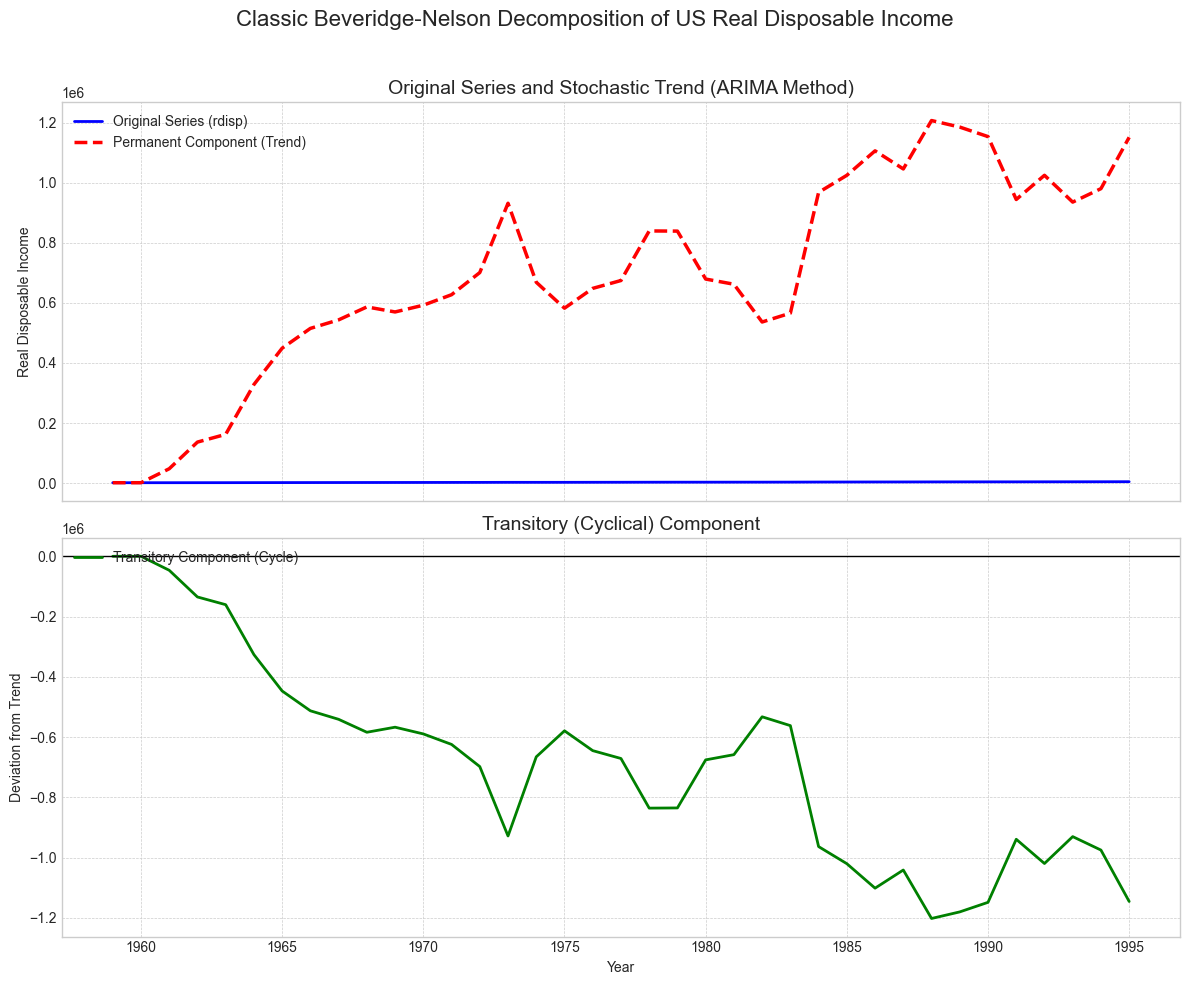

Plot displayed successfully.


In [43]:
# =============================================================================
# Beveridge-Nelson Decomposition of US Real Disposable Income
# (Classic ARIMA-based Method from Beveridge & Nelson, 1981)
#
# This script performs a BN decomposition by following the classic method:
# 1. An ARIMA model is fitted to the data.
# 2. The permanent and transitory components are derived from the
#    parameters and residuals of the fitted model.
# =============================================================================

# --- 0. Import Necessary Libraries ---
import wooldridge as wd
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
print("--- Step 1: Load and Prepare the Data ---")
try:
    consump = wd.data('consump')
    df = consump[['year', 'rdisp']]
    df.set_index('year', inplace=True)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data. Error: {e}")
    exit()

# The series is known to be I(1) from the previous analysis.

# --- 2. Fit an ARIMA Model ---
print("\n--- Step 2: Fitting an ARIMA Model ---")

# The BN decomposition works on an ARIMA(p, 1, q) process. We will model
# the 'rdisp' series. A common choice for economic series is an ARIMA(1,1,1).
# We will use this as a starting point. The 'd' is 1 because the series is I(1).
# The model for the differenced series (d_rdisp) is ARMA(1,1).
# d_rdisp_t = c + phi_1 * d_rdisp_{t-1} + theta_1 * e_{t-1} + e_t
arima_model = ARIMA(df['rdisp'], order=(1, 1, 1))
arima_results = arima_model.fit()

print("ARIMA(1,1,1) model fitted successfully.")
print(arima_results.summary())

# Extract parameters and residuals
# NOTE: For an ARIMA model with d > 0, statsmodels calls the constant term 'drift'.
try:
    c = arima_results.params['drift']
except KeyError:
    # If no drift is estimated (e.g., trend='n'), set it to 0.
    c = 0
    print("No drift term found in model results. Assuming drift is 0.")

phi = arima_results.params['ar.L1']
theta = arima_results.params['ma.L1']
residuals = arima_results.resid

# --- 3. Construct Permanent and Transitory Components ---
print("\n--- Step 3: Constructing BN Components from ARIMA results ---")

# The core of the BN decomposition is defining the permanent component
# based on the long-run forecast of the series.
# For an ARIMA(p,1,q) model, the change in the permanent component is:
# d_mu_t = c + psi(1)*e_t
# where psi(1) = (1 + sum of theta_i) / (1 - sum of phi_i)

# Calculate psi(1)
psi_1 = (1 + theta) / (1 - phi)

# Calculate the change in the permanent component
df['d_perm'] = c + psi_1 * residuals

# Cumulatively sum the changes to get the level of the permanent component.
# We initialize the permanent component at the first value of the original series.
# The first residual is often 0, so we start the cumsum from the second element.
df['permanent_component'] = df['d_perm'].cumsum()
# Adjust to start from the first observation's value
df['permanent_component'] = df['permanent_component'] - df['permanent_component'].iloc[1] + df['rdisp'].iloc[1]
df.loc[df.index[0], 'permanent_component'] = df['rdisp'].iloc[0] # Set first value directly


# The transitory component is the difference between the original series and the permanent one.
df['transitory_component'] = df['rdisp'] - df['permanent_component']

print("Permanent and transitory components have been calculated.")
print(df.tail())

# --- 4. Visualize the Results ---
print("\n--- Step 4: Visualizing the Results ---")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Classic Beveridge-Nelson Decomposition of US Real Disposable Income', fontsize=16)

# Plot 1: Original Series and Permanent Component (Trend)
ax1.plot(df.index, df['rdisp'], label='Original Series (rdisp)', color='blue', linewidth=2)
ax1.plot(df.index, df['permanent_component'], label='Permanent Component (Trend)', color='red', linestyle='--', linewidth=2.5)
ax1.set_title('Original Series and Stochastic Trend (ARIMA Method)', fontsize=14)
ax1.set_ylabel('Real Disposable Income')
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2: Transitory Component (Cycle)
ax2.plot(df.index, df['transitory_component'], label='Transitory Component (Cycle)', color='green', linewidth=2)
ax2.axhline(0, color='black', linestyle='-', linewidth=1) # Add a zero line
ax2.set_title('Transitory (Cyclical) Component', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Deviation from Trend')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("Plot displayed successfully.")


--- Step 1: Load and Prepare the Data ---
Data loaded successfully.
            rdisp
year             
1959  1530.099976
1960  1565.400024
1961  1615.800049
1962  1693.699951
1963  1755.500000


--- Step 2: Checking for Stationarity ---
ADF Test on rdisp (levels):
  - ADF Statistic: 0.7493
  - p-value: 0.9908
  - Result: The series is non-stationary (fail to reject H0).
--------------------
ADF Test on rdisp (first difference):
  - ADF Statistic: -5.6380
  - p-value: 0.0000
  - Result: The differenced series is stationary (reject H0).

Conclusion: 'rdisp' is an I(1) series, suitable for BN decomposition.


--- Step 3: Performing the BN Decomposition ---
Unobserved Components model fitted successfully.
Permanent and transitory components have been calculated.
            rdisp  permanent_component  transitory_component
year                                                        
1991  4486.500000          4486.500142             -0.000142
1992  4613.700195          4613.700112         

c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\daves\AppData\Local\Temp\ipykernel_2872\400849249.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['permanent_component'] = uc_results.level['smoothed']
C:\Users\daves\AppData\Local\Temp\ipykernel_2872\400849249.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

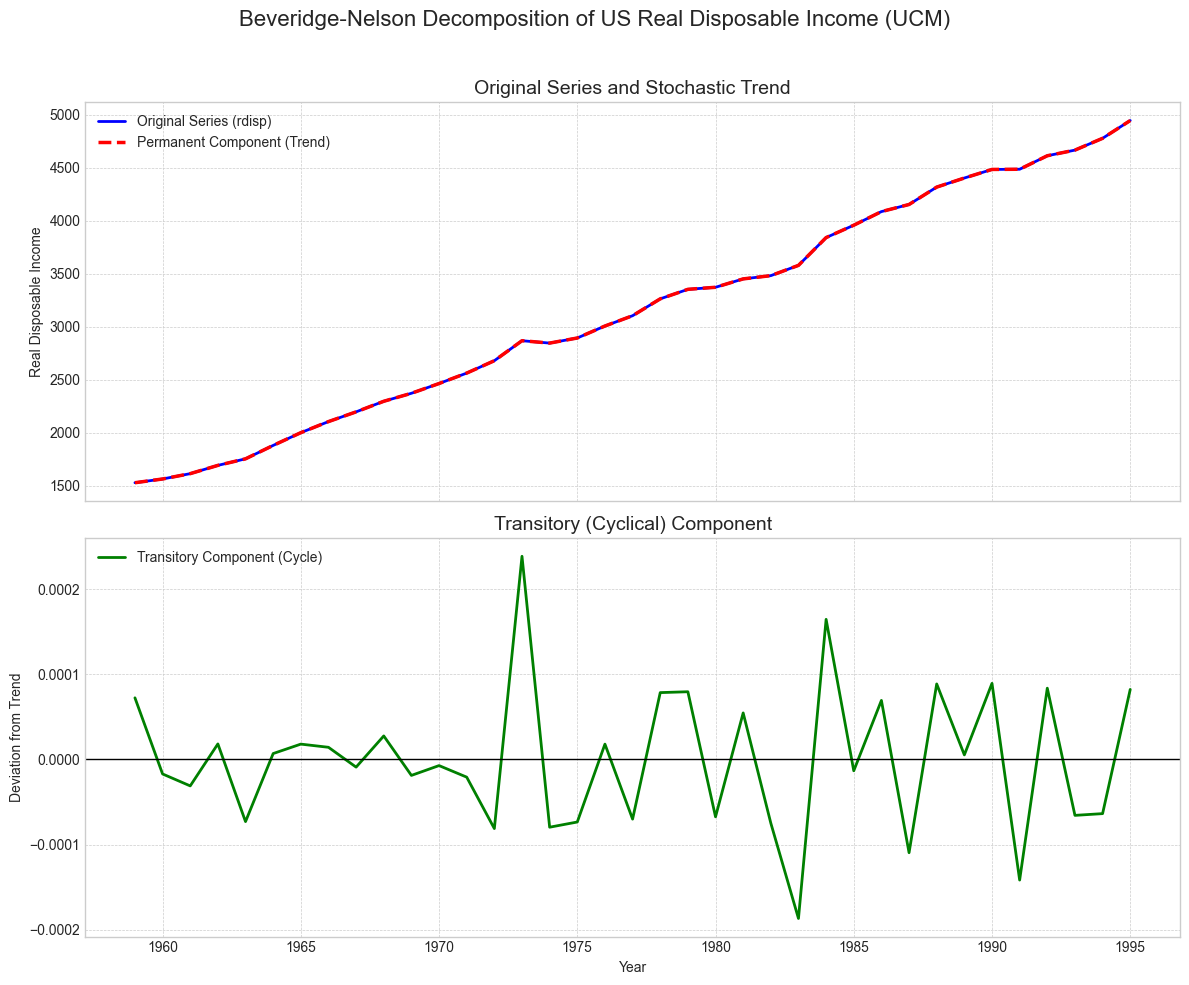

Plot displayed successfully.


In [44]:
# =============================================================================
# Beveridge-Nelson Decomposition of US Real Disposable Income
# (Unobserved Components Model)
#
# This script performs a Beveridge-Nelson (BN) decomposition on the 'rdisp'
# (real disposable personal income) variable from the 'consump' dataset
# found in the 'wooldridge' package.
#
# The BN decomposition separates a non-stationary time series into a
# permanent component (a stochastic trend) and a transitory component (a
# stationary cycle).
#
# We will use the Unobserved Components model from the statsmodels library,
# specifically the 'local linear trend' model, which provides a robust
# method for estimating the permanent component.
# =============================================================================

# --- 1. Load and Prepare the Data ---
print("--- Step 1: Load and Prepare the Data ---")
try:
    consump = wd.data('consump')
    df = consump[['year', 'rdisp']]
    df.set_index('year', inplace=True)
    print("Data loaded successfully.")
    print(df.head())
    print("\n" + "="*50 + "\n")
except Exception as e:
    print(f"Failed to load data. Error: {e}")
    exit()

# --- 2. Check for Stationarity (Unit Root Test) ---
print("--- Step 2: Checking for Stationarity ---")

# We use the Augmented Dickey-Fuller (ADF) test to check for a unit root.
# The null hypothesis of the ADF test is that the series has a unit root
# (it is non-stationary). A low p-value (< 0.05) rejects the null hypothesis.

# Test the series in levels
adf_result_levels = adfuller(df['rdisp'])
print(f"ADF Test on rdisp (levels):")
print(f"  - ADF Statistic: {adf_result_levels[0]:.4f}")
print(f"  - p-value: {adf_result_levels[1]:.4f}")
if adf_result_levels[1] > 0.05:
    print("  - Result: The series is non-stationary (fail to reject H0).")
else:
    print("  - Result: The series is stationary (reject H0).")

print("-" * 20)

# Test the series in first differences
adf_result_diff = adfuller(df['rdisp'].diff().dropna())
print(f"ADF Test on rdisp (first difference):")
print(f"  - ADF Statistic: {adf_result_diff[0]:.4f}")
print(f"  - p-value: {adf_result_diff[1]:.4f}")
if adf_result_diff[1] > 0.05:
    print("  - Result: The differenced series is non-stationary.")
else:
    print("  - Result: The differenced series is stationary (reject H0).")

print("\nConclusion: 'rdisp' is an I(1) series, suitable for BN decomposition.")
print("\n" + "="*50 + "\n")


# --- 3. Perform the Beveridge-Nelson Decomposition ---
print("--- Step 3: Performing the BN Decomposition ---")

# We use the Unobserved Components model (UCM), which can represent the series
# in a state-space form. The 'local linear trend' model is appropriate
# for an I(1) series and provides the permanent component (the trend).

# Define the model: 'lltrend' specifies a local linear trend.
# This model estimates a stochastic level and a stochastic slope.
uc_model = sm.tsa.UnobservedComponents(df['rdisp'], 'lltrend')

# Fit the model
uc_results = uc_model.fit(disp=False)

print("Unobserved Components model fitted successfully.")
# print(uc_results.summary()) # Uncomment to see detailed model results

# Extract the permanent component (the smoothed level/trend)
# This corresponds to the stochastic trend in the BN decomposition.
df['permanent_component'] = uc_results.level['smoothed']

# Calculate the transitory component (the cycle) by subtracting the
# permanent component from the original series.
df['transitory_component'] = df['rdisp'] - df['permanent_component']

print("Permanent and transitory components have been calculated.")
print(df.tail())
print("\n" + "="*50 + "\n")


# --- 4. Visualize the Results ---
print("--- Step 4: Visualizing the Results ---")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Beveridge-Nelson Decomposition of US Real Disposable Income (UCM)', fontsize=16)

# Plot 1: Original Series and Permanent Component (Trend)
ax1.plot(df.index, df['rdisp'], label='Original Series (rdisp)', color='blue', linewidth=2)
ax1.plot(df.index, df['permanent_component'], label='Permanent Component (Trend)', color='red', linestyle='--', linewidth=2.5)
ax1.set_title('Original Series and Stochastic Trend', fontsize=14)
ax1.set_ylabel('Real Disposable Income')
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2: Transitory Component (Cycle)
ax2.plot(df.index, df['transitory_component'], label='Transitory Component (Cycle)', color='green', linewidth=2)
ax2.axhline(0, color='black', linestyle='-', linewidth=1) # Add a zero line
ax2.set_title('Transitory (Cyclical) Component', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Deviation from Trend')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("Plot displayed successfully.")


--- Step 1: Load and Prepare the Data ---
Data loaded successfully.

--- Step 2: Applying the Hodrick-Prescott Filter ---
HP filter applied with lambda = 6.25.
Trend and cyclical components have been calculated.
            rdisp     hp_trend   hp_cycle
year                                     
1991  4486.500000  4534.415026 -47.915026
1992  4613.700195  4614.765983  -1.065788
1993  4666.899902  4702.448985 -35.549083
1994  4778.200195  4799.973144 -21.772949
1995  4945.799805  4904.159717  41.640088

--- Step 3: Visualizing the Results ---


C:\Users\daves\AppData\Local\Temp\ipykernel_2872\346435759.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp_trend'] = trend
C:\Users\daves\AppData\Local\Temp\ipykernel_2872\346435759.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp_cycle'] = cycle


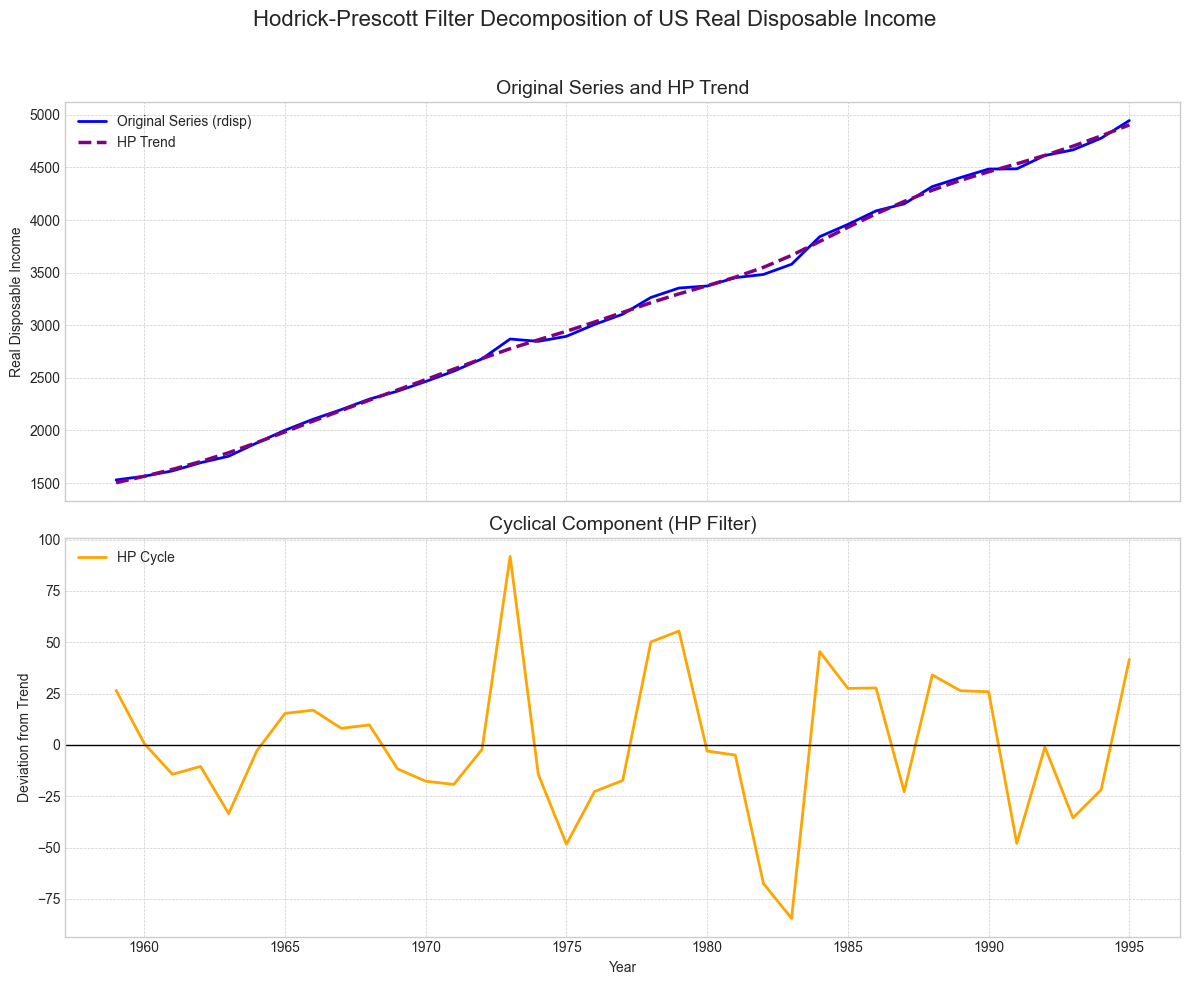

Plot displayed successfully.


In [51]:
# =============================================================================
# Hodrick-Prescott (HP) Filter Decomposition of US Real Disposable Income
#
# This script applies the Hodrick-Prescott (HP) filter to the 'rdisp'
# (real disposable personal income) variable from the 'consump' dataset.
#
# The HP filter is a data-smoothing technique that separates a time series
# into a long-term trend component and a cyclical component. It does this by
# minimizing a function that penalizes both the variance of the cyclical
# component and the roughness of the trend component.
# =============================================================================


# --- 1. Load and Prepare the Data ---
print("--- Step 1: Load and Prepare the Data ---")
try:
    consump = wd.data('consump')
    df = consump[['year', 'rdisp']]
    df.set_index('year', inplace=True)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data. Error: {e}")
    exit()

# --- 2. Apply the Hodrick-Prescott Filter ---
print("\n--- Step 2: Applying the Hodrick-Prescott Filter ---")

# The HP filter requires a smoothing parameter, lambda (lamb).
# The choice of lambda depends on the frequency of the data.
# Standard values are:
# - 1600 for quarterly data
# - 14400 for monthly data
# - 6.25 for annual data (as suggested by Ravn and Uhlig, 2002)
# Since our data is annual, we will use lambda = 6.25.
hp_lambda = 6.25

# The hpfilter function from statsmodels returns the cyclical component
# and the trend component. The function is located in statsmodels.tsa.filters.hp_filter
# In older versions, it is not available directly under sm.tsa.
cycle, trend = sm.tsa.filters.hpfilter(df['rdisp'], lamb=hp_lambda)

# Add the new components to our DataFrame
df['hp_trend'] = trend
df['hp_cycle'] = cycle

print(f"HP filter applied with lambda = {hp_lambda}.")
print("Trend and cyclical components have been calculated.")
print(df.tail())

# --- 3. Visualize the Results ---
print("\n--- Step 3: Visualizing the Results ---")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Hodrick-Prescott Filter Decomposition of US Real Disposable Income', fontsize=16)

# Plot 1: Original Series and HP Trend
ax1.plot(df.index, df['rdisp'], label='Original Series (rdisp)', color='blue', linewidth=2)
ax1.plot(df.index, df['hp_trend'], label='HP Trend', color='purple', linestyle='--', linewidth=2.5)
ax1.set_title('Original Series and HP Trend', fontsize=14)
ax1.set_ylabel('Real Disposable Income')
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2: HP Cyclical Component
ax2.plot(df.index, df['hp_cycle'], label='HP Cycle', color='orange', linewidth=2)
ax2.axhline(0, color='black', linestyle='-', linewidth=1) # Add a zero line
ax2.set_title('Cyclical Component (HP Filter)', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Deviation from Trend')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("Plot displayed successfully.")


In [52]:
## For other filters: https://www.statsmodels.org/dev/tsa.html#time-series-filters